# 1.Loading Data and EDA

In [69]:
# general library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_numeric_dtype
import seaborn as sns

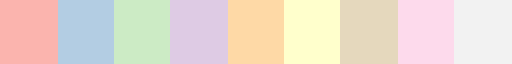

In [70]:
from matplotlib.colors import rgb2hex
cmap = plt.get_cmap("Pastel1",256)
palette = cmap.colors
palette = pd.DataFrame({'color': [rgb2hex(x) for x in palette]}).drop_duplicates()
palette = list(palette['color'].values)
cmap

## Mục đích của bài toán

Customer churn là một thuật ngữ trong kinh doanh,được hiểu là sự rời đi của khách hàng. Vậy, Customer churn rate có nghĩa là tỷ lệ khách hàng rời đi trong một khoảng thời gian nhất định. 

Trong kinh doanh, nếu khách hàng cảm thấy không hài lòng, không thỏa mãn với dịch vụ và sản phẩm mà bạn cung cấp, họ sẽ rời đi, hay nói cách khác, họ sẽ ngừng kết nối hoặc ngừng sử dụng sản phẩm và dịch vụ của bạn. 

In [71]:
from google.colab import drive
drive.mount('/content/drive')
telco = pd.read_csv('/content/drive/MyDrive/phat_trien_phan_mem_nang_cao_cho_tinh_toan_khoa_hoc/telco_churn/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Source: [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)

* CustomerID - Mã khách hàng
* Gender - Giới tính của khách hàng
* SeniorCitizen - Khách hàng trên 65 tuổi hay không
* Partner - Khách hàng có gia đình hay chưa
* Dependents - Khách hàng có người phụ thuộc hay không (Yes, No)
* Tenure - Số tháng mà khách hàng đã sử dụng dịch vụ
* PhoneService - Khách hàng có sử dụng dịch vụ điện thoại bàn hay không (Yes, No)
* MultipleLines - Khách hàng có đăng ký nhiều đường dây điện thoại hay không (Yes, No, No phone service)
* InternetService - Hình thức khách hàng được cung cấp dịch vụ internet (DSL, Fiber optic, No)
* OnlineSecurity - Khách hàng có sử dụng dịch vụ bảo mật trực tuyến (Yes, No, No internet service)
* OnlineBackup - Khách hàng có sử dụng dịch vụ sao lưu trực tuyến hay không (Yes, No, No internet service)
* DeviceProtection - Khách hàng có sử dụng dịch vụ bảo vệ thiết bị hay không (Yes, No, No internet service)
* TechSupport - Khách hàng có sử dụng dịch vụ Hỗ trợ kỹ thuật hay không (Yes, No, No internet service)
* StreamingTV - Khách hàng có sử dụng dịch vụ internet để truyền phát chương trình truyền hình hay không (Yes, No, No internet service)
* StreamingMovies - Khách hàng có sử dụng dịch vụ internet để truyền phát phim hay không (Yes, No, No internet service)
* Contract - Loại hợp đồng của Khách hàng (Month-to-month, One year, Two year)
* PaperlessBilling - Khách hàng sử dụng dịch vụ thanh toán hóa đơn trực tuyến hay không (Yes, No)
* PaymentMethod - Hình thức Khách hàng dùng để thanh toán (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - Số tiền phí dịch vụ của Khách hàng phải trả hàng tháng
* TotalCharges - Tổng số tiền phí dịch vụ của Khách hàng phải trả
* Churn - Khách hàng có ngừng sử dụng dịch vụ hay không (Yes or No)

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Vậy chúng ta có một bảng có 7042 quan sát và 21 biến

In [ ]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Chúng ta thấy 2 cột TotalCharges & SeniorCitizen đang sai kiểu dữ liệu nên thực hiên biến đổi

In [ ]:
telco['TotalCharges'] = telco['TotalCharges'].apply(lambda x: float(x) if x != ' ' else np.nan)
telco['SeniorCitizen'] = telco['SeniorCitizen'].astype('str')
telco.drop(columns = ['customerID'], inplace = True)

In [72]:
#check for duplicate values
telco.duplicated(keep='first').any()

False

Vậy không có dòng bị duplicate

In [ ]:
#Check if there is anu null values
telco.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Vì số lượng bản ghi bị missing TotalCharges ít (11) nên có thể lựa chọn cách đơn giản nhất là loại bỏ bản ghi đó đi
Nếu để ý kỹ hơn thì ta thấy MonthlyCharges có khả năng là biến phái sinh (trung bình số tiền KH phải chi trả cho dịch vụ hàng tháng) vì thế ta có thể sử dụng linear regression đơn giản để điền lại giá trị bị missing
Nếu các biến có correlation cao thì có thể bỏ biến bị missing đi

In [ ]:
telco = telco.dropna(subset=['TotalCharges'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

telco1 = telco.copy(deep = True)
text_data_features = [i for i in list(telco.columns) if i not in list(telco.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
  telco1[i] = le.fit_transform(telco1[i])
  print(i, ' : ', telco1[i].unique(), ' =', le.inverse_transform(telco1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  = ['Female' 'Male']
SeniorCitizen  :  [0 1]  = ['0' '1']
Partner  :  [1 0]  = ['Yes' 'No']
Dependents  :  [0 1]  = ['No' 'Yes']
PhoneService  :  [0 1]  = ['No' 'Yes']
MultipleLines  :  [1 0 2]  = ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  = ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  = ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  = ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  = ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  = ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  = ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  = ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  = ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  = ['No' 'Yes']


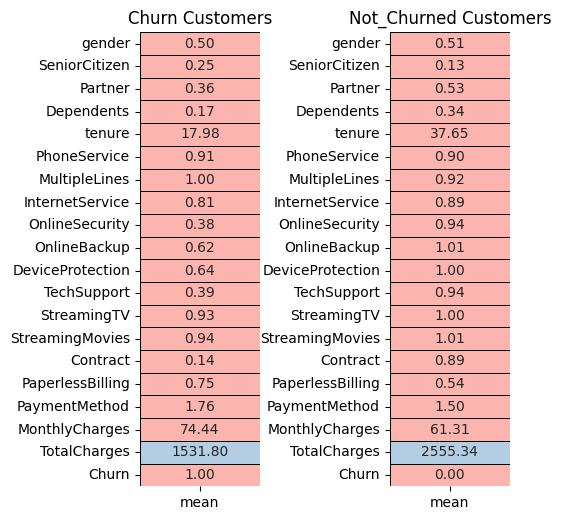

In [ ]:
colors = palette[:2]

churn = telco1[telco1['Churn'] == 1].describe().T
not_churn = telco1[telco1['Churn'] == 0].describe().T

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (5, 5))
plt.subplot(1, 2, 1)
sns.heatmap(churn[['mean']], annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('Churn Customers');

plt.subplot(1, 2, 2)
sns.heatmap(not_churn[['mean']], annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

Từ biểu đồ Mean của các features cho 2 nhóm khách hàng, ta thấy:
- Nhóm Churn có mean_tenure = 17.98 tháng thấp hơn so với mean_tenure = 37.57 tháng của nhóm Chưa Churn
- Mean của: OnlineSecurity, OnlineBackup, DeviceProtection và TechSupport của nhóm Churn thấp hơn so với nhóm Chưa Churn. Những features này đáng được lưu ý.
- Giá trị hợp đồng của nhóm Churn thường thấp hơn nhóm Chưa Churn
- Nhưng giá trị MonthlyCharges của nhóm Churn = 74.44 lớn hơn nhóm Chưa Churn = 61.27
- TotalCharges nhóm Churn là 1,531.8 thấp hơn 2,557.31 của nhóm Chưa Churn
- Từ những mean của các features trên ta thấy có sự chênh lệch rõ ràng của một số features nhóm Churn so với Chưa Churn, từ đó giúp ta chú ý đến một số dịch vụ để có thể giữ chân khách hàng.
- Những features dạng categorical có mean = 0.

## EDA

### Biến đầu ra

In [ ]:
col = list(telco1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(telco[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


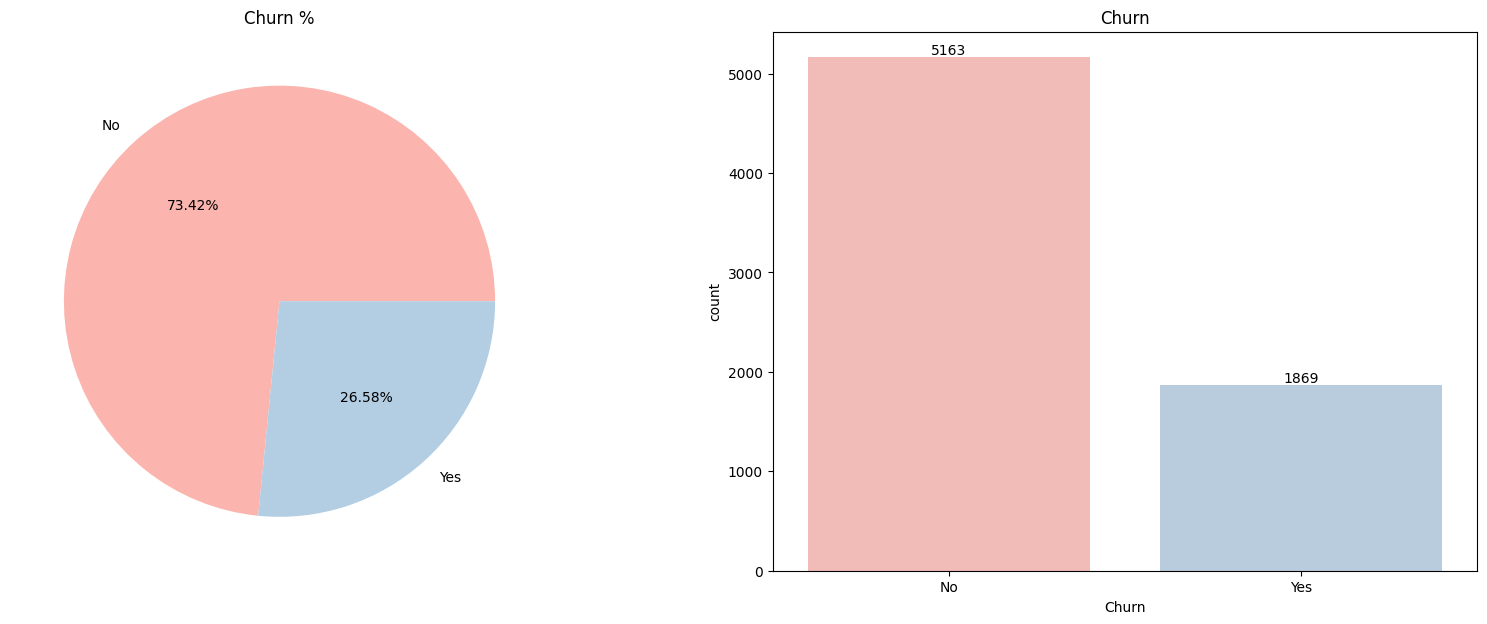

In [ ]:
def cate_plot(telco, col_name, ):
    distr = telco[col_name].value_counts().to_frame().reset_index()
    distr['distr'] = distr[col_name]/distr[col_name].sum()*100
    label_list = distr['index'].values
    pie_values = distr['distr'].values
    fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

    plt.subplot(1,2,1)
    plt.pie(pie_values,labels = label_list, 
            autopct = '%1.2f%%',
            colors = palette)
    plt.title(col_name + ' %');

    plt.subplot(1,2,2)
    ax = sns.countplot(data = telco, 
                       x=col_name,
                       palette = palette)
    for i in ax.containers:
        ax.bar_label(i,)
    ax.set_xticklabels(label_list)
    plt.title(col_name)
    plt.show()
    
cate_plot(telco, 'Churn')

- Tập dữ liệu chứa tỉ lệ nhãn chênh lệch: Churn-Not_Churn - 1:3
- Do vậy việc dự đoán dễ bị thiên lệch do nhóm Not-Churn

### Biến đầu vào

In [ ]:
num_cols = numerical_features
cate_cols = categorical_features

#### Biến liên tục

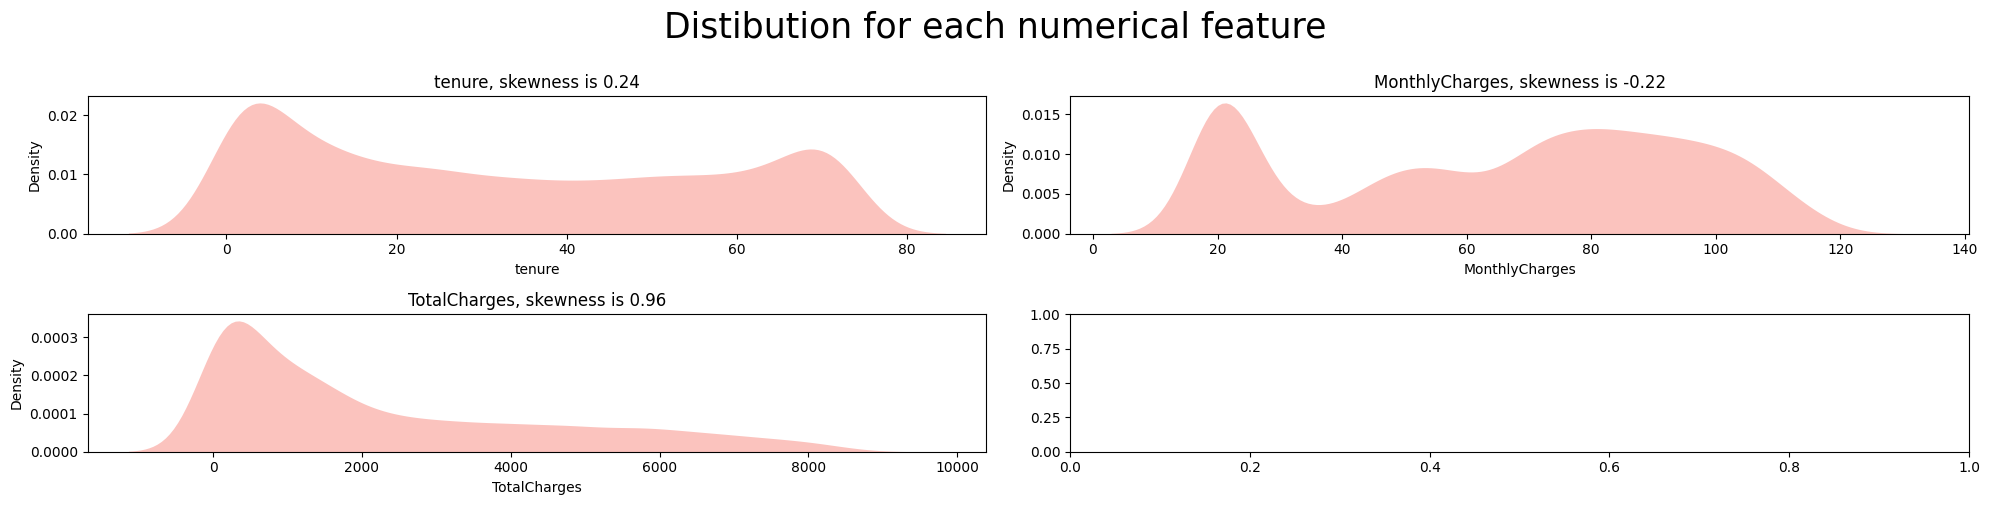

In [ ]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color=palette[0])
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=telco, columns_list=num_cols, 
            rows=2, cols=2, suptitle='Distibution for each numerical feature')
plt.tight_layout()

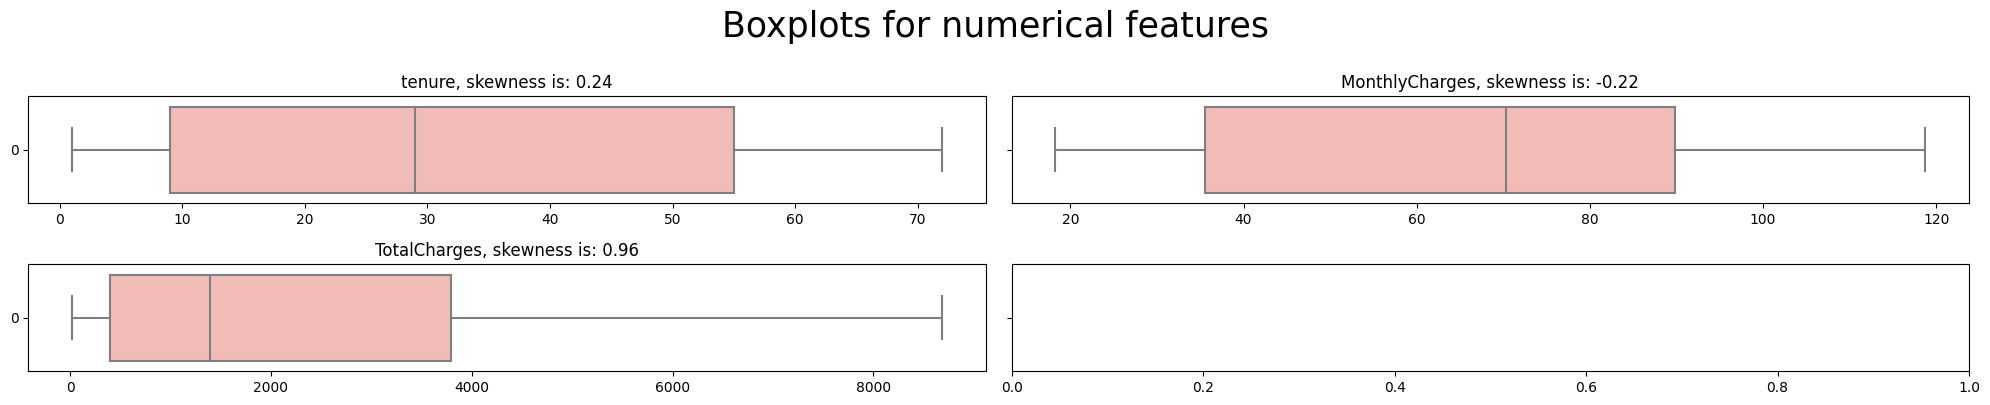

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,4))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette = palette)
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=telco, columns_list=num_cols, 
                rows=2, cols=2, suptitle='Boxplots for numerical features')
plt.tight_layout()

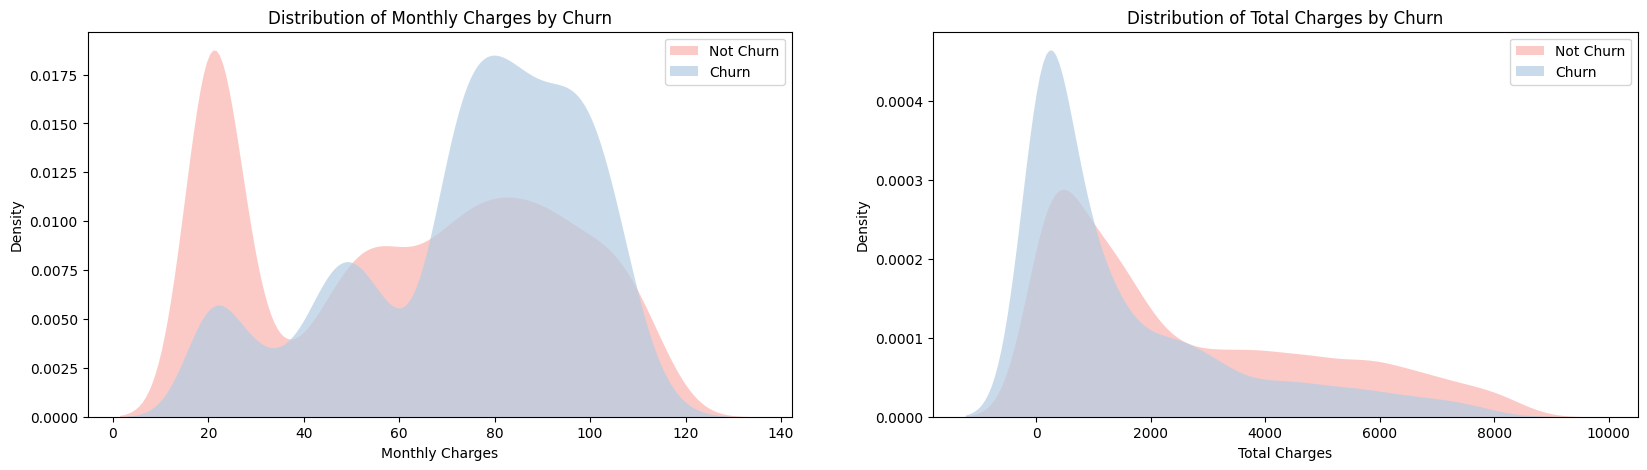

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(telco1.MonthlyCharges[(telco1["Churn"] == 0)], color=palette[0], fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(telco1.MonthlyCharges[(telco1["Churn"] == 1)], color=palette[1], fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.subplot(1,2,2)
ax = sns.kdeplot(telco1.TotalCharges[(telco1["Churn"] == 0)], color=palette[0], fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(telco1.TotalCharges[(telco1["Churn"] == 1)], color=palette[1], fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')
plt.show()

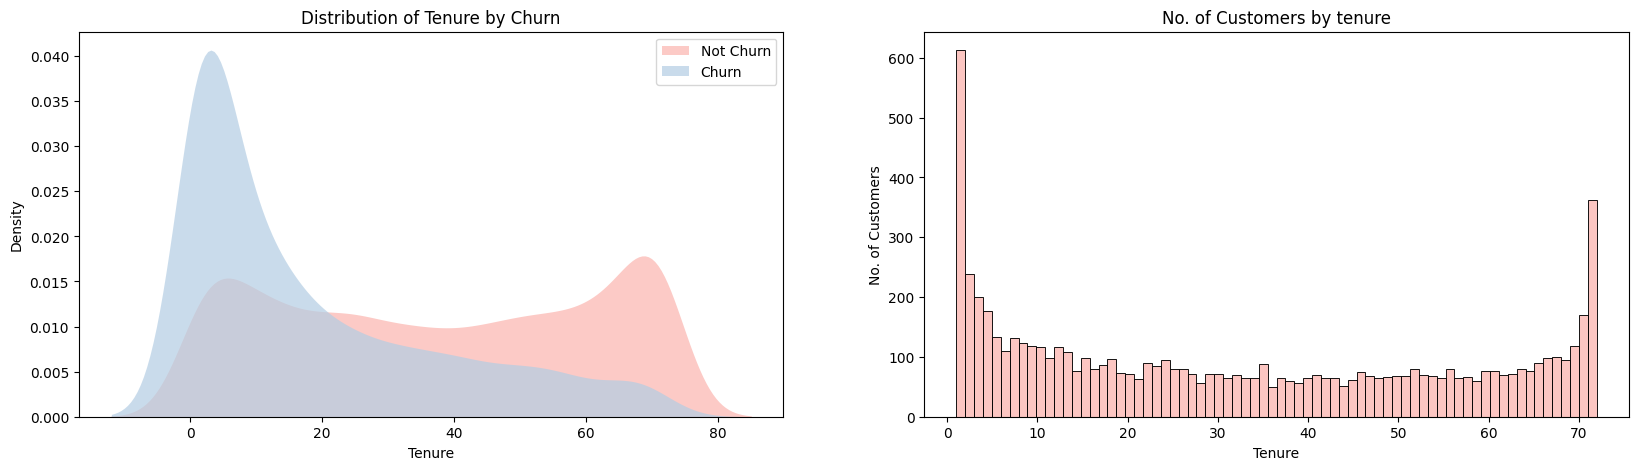

In [ ]:
#plt.figure(figsize=(7,3))

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(telco1.tenure[(telco1["Churn"] == 0)], color=palette[0], fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(telco1.tenure[(telco1["Churn"] == 1)], color=palette[1], fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by Churn')

plt.subplot(1,2,2)
ax = sns.histplot(telco1["tenure"], bins=72, kde=False, color=palette[0])
ax.set(title = "No. of Customers by tenure")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')

plt.show()

#### Biến rời rạc

gender


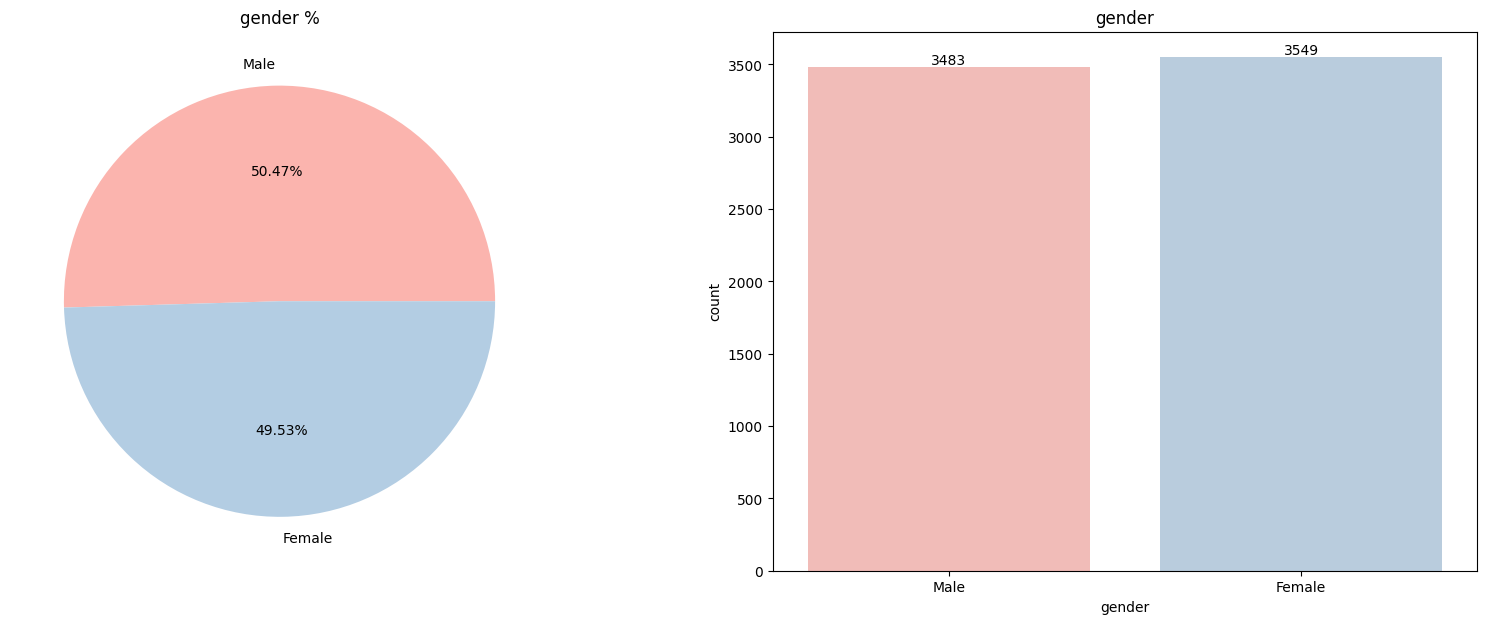

SeniorCitizen


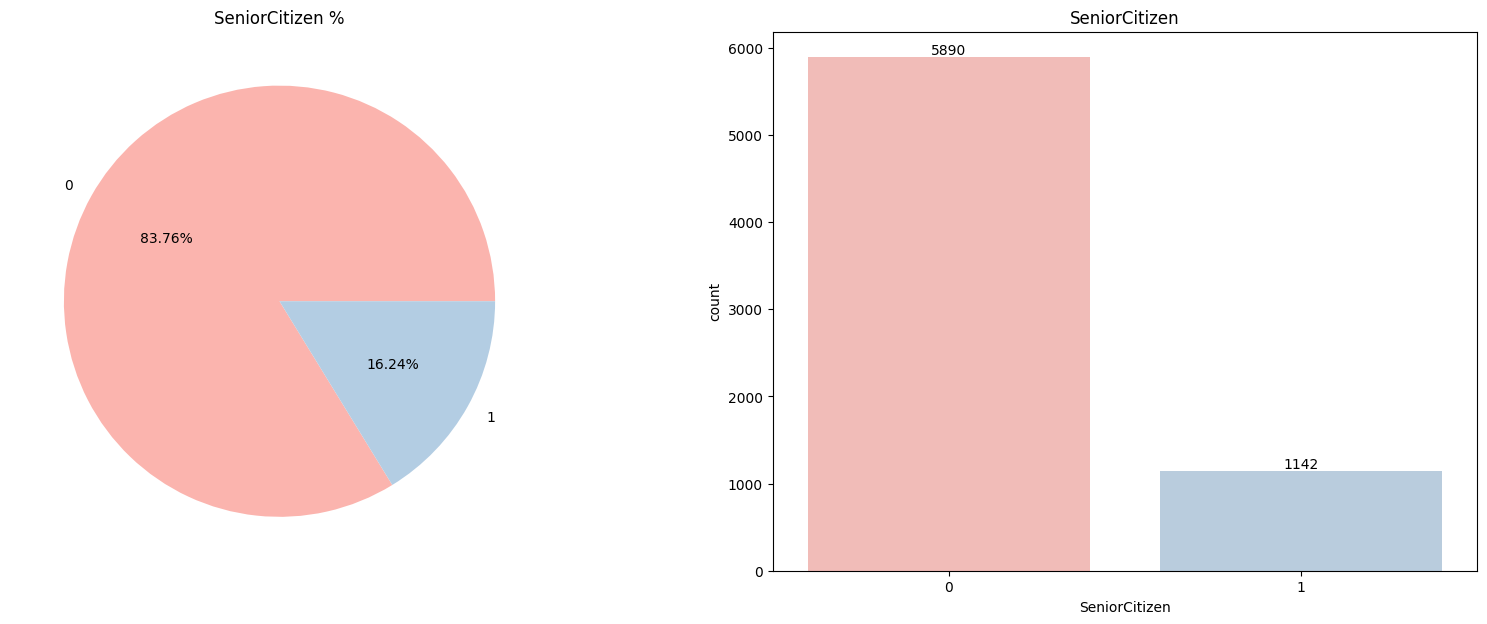

Partner


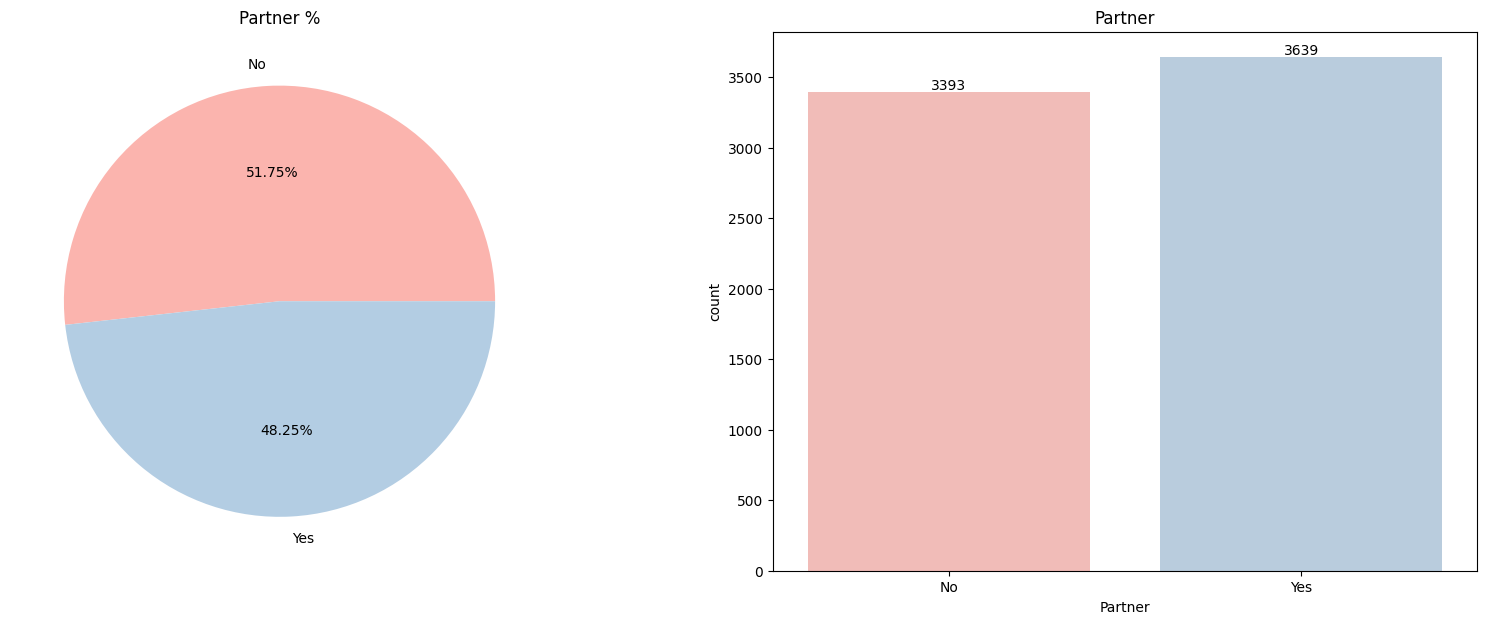

Dependents


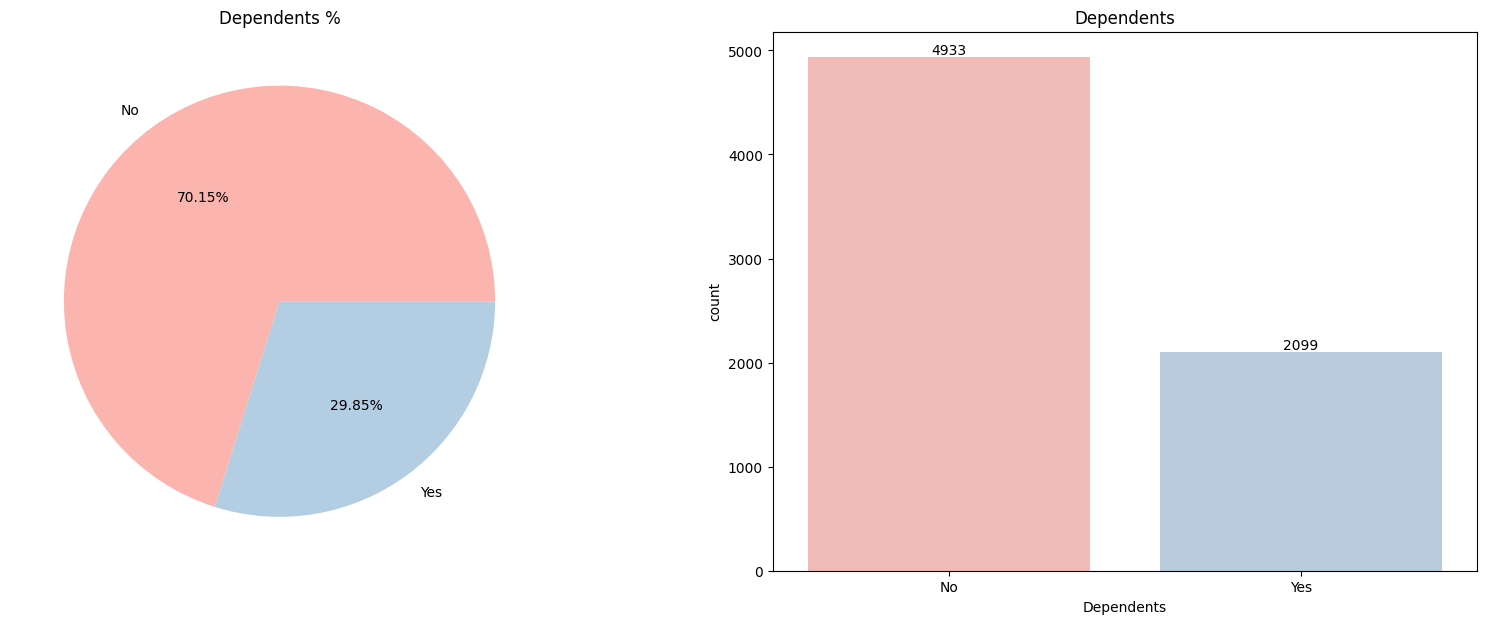

PhoneService


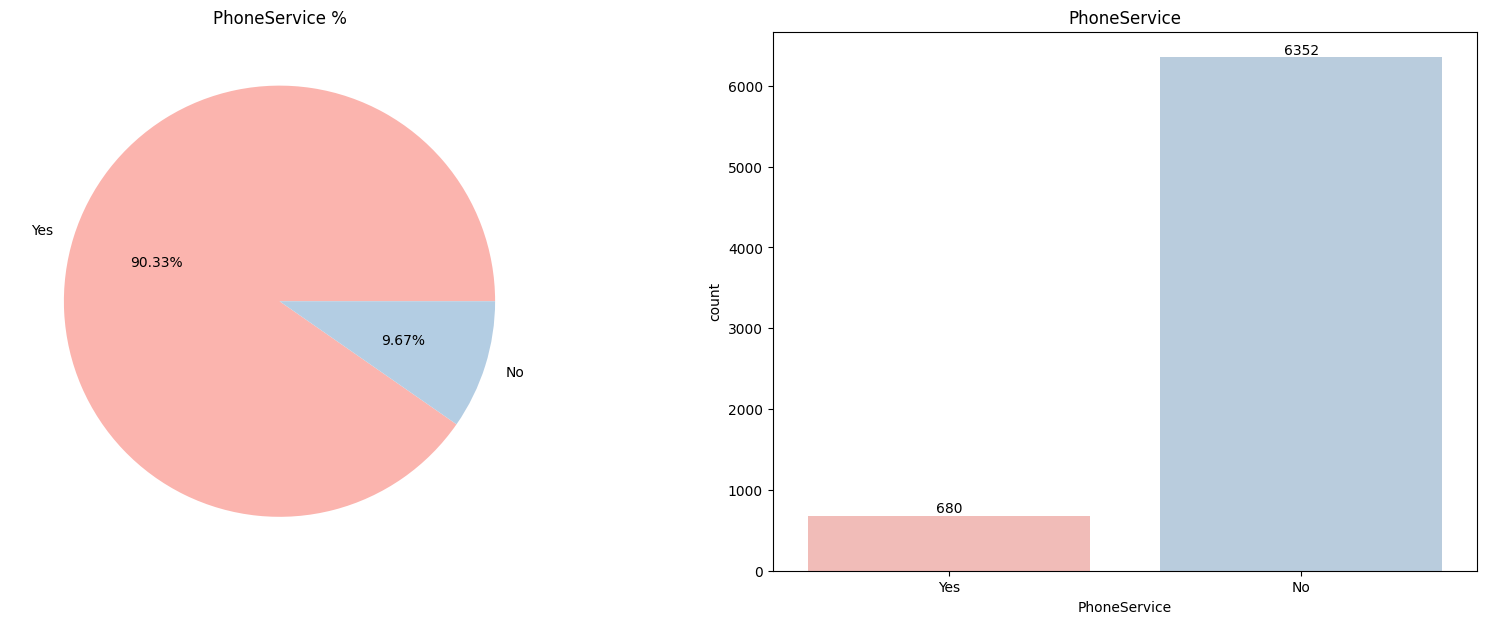

MultipleLines


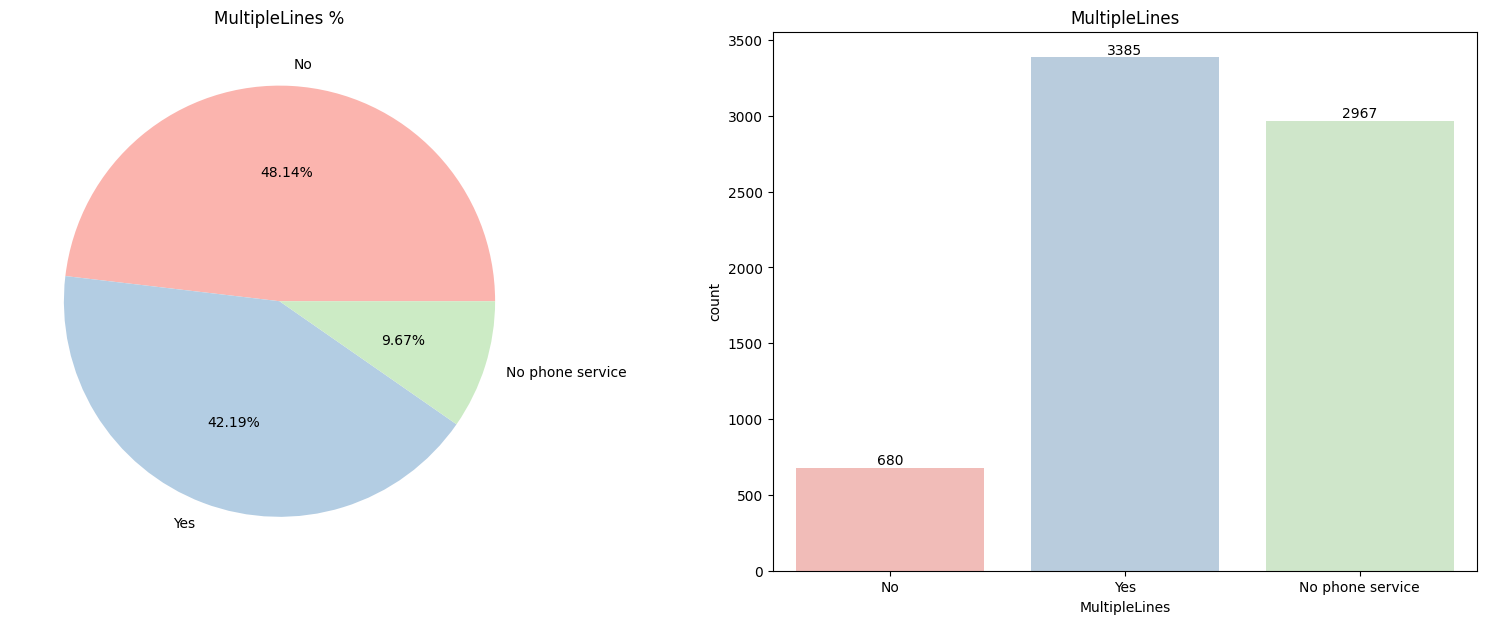

InternetService


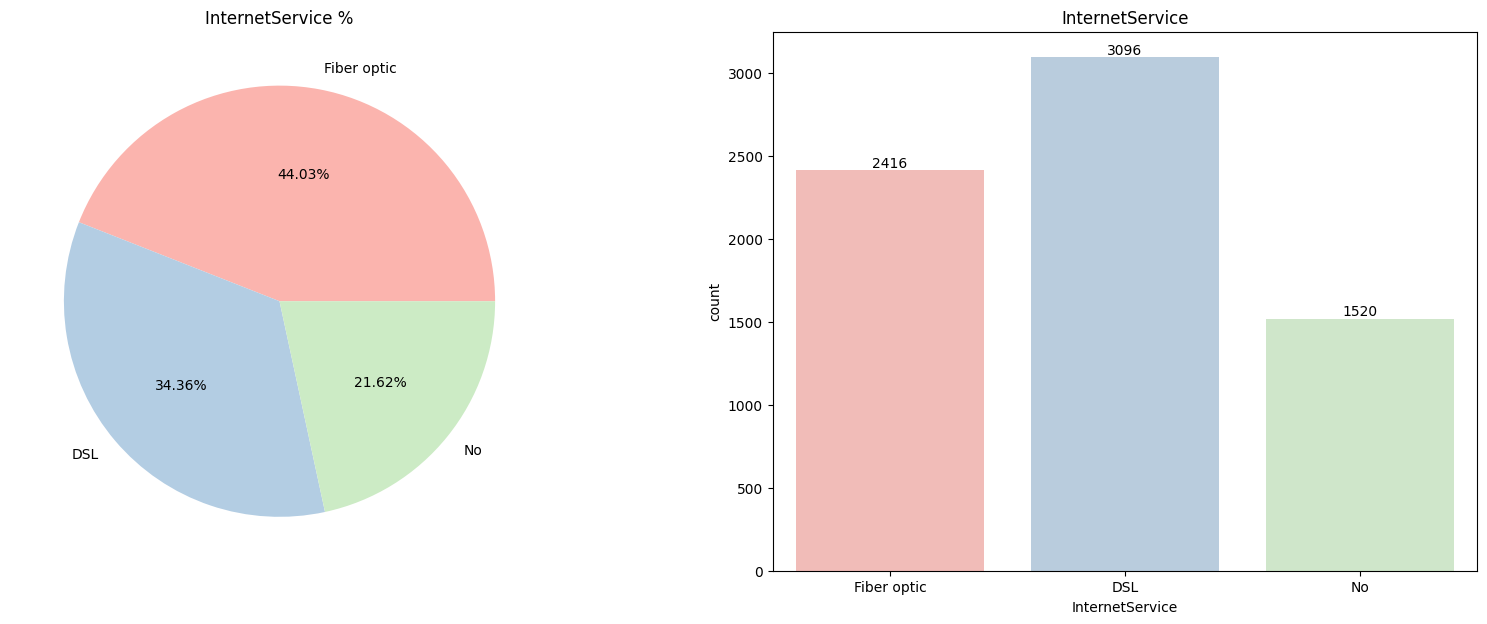

OnlineSecurity


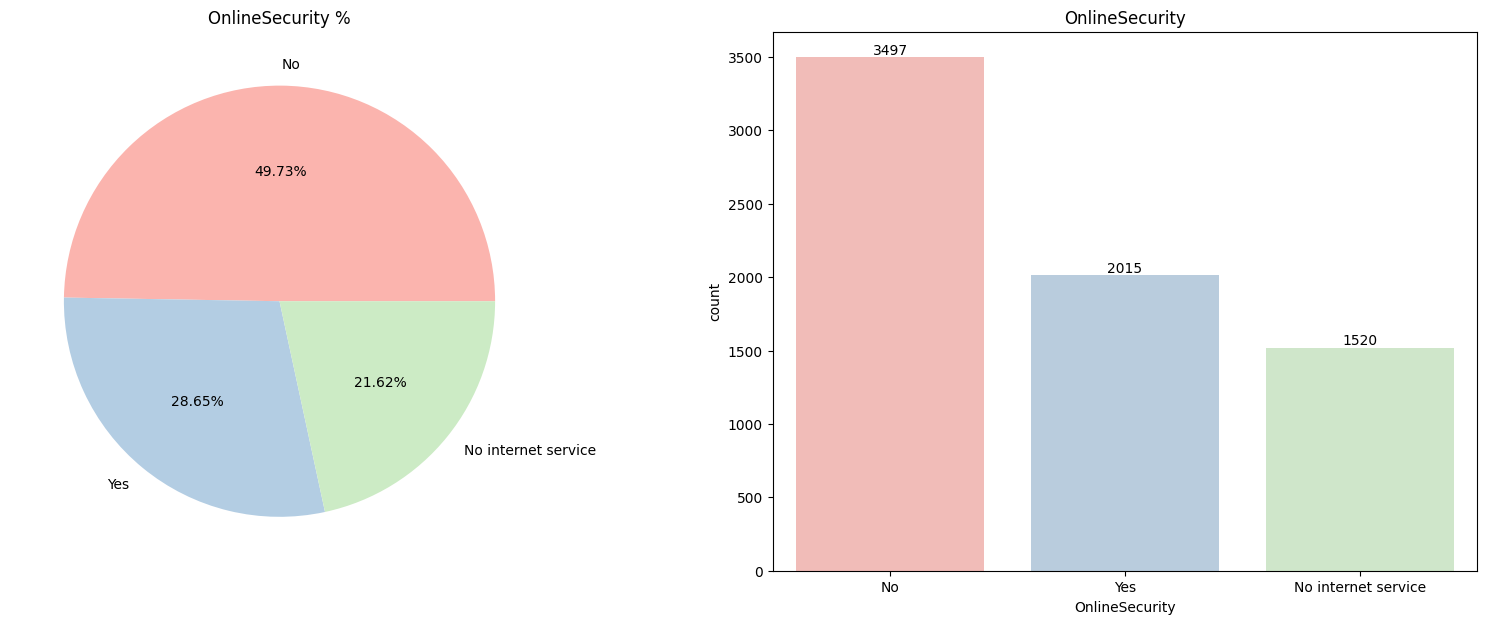

OnlineBackup


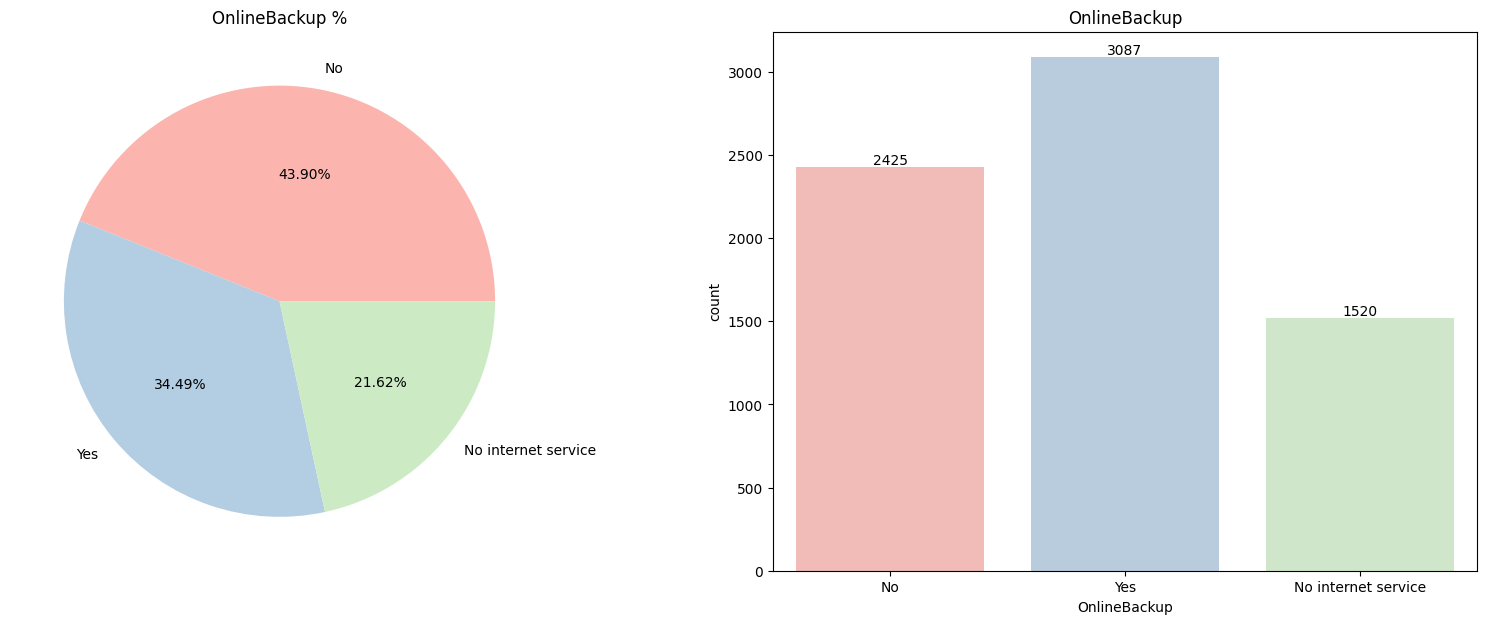

DeviceProtection


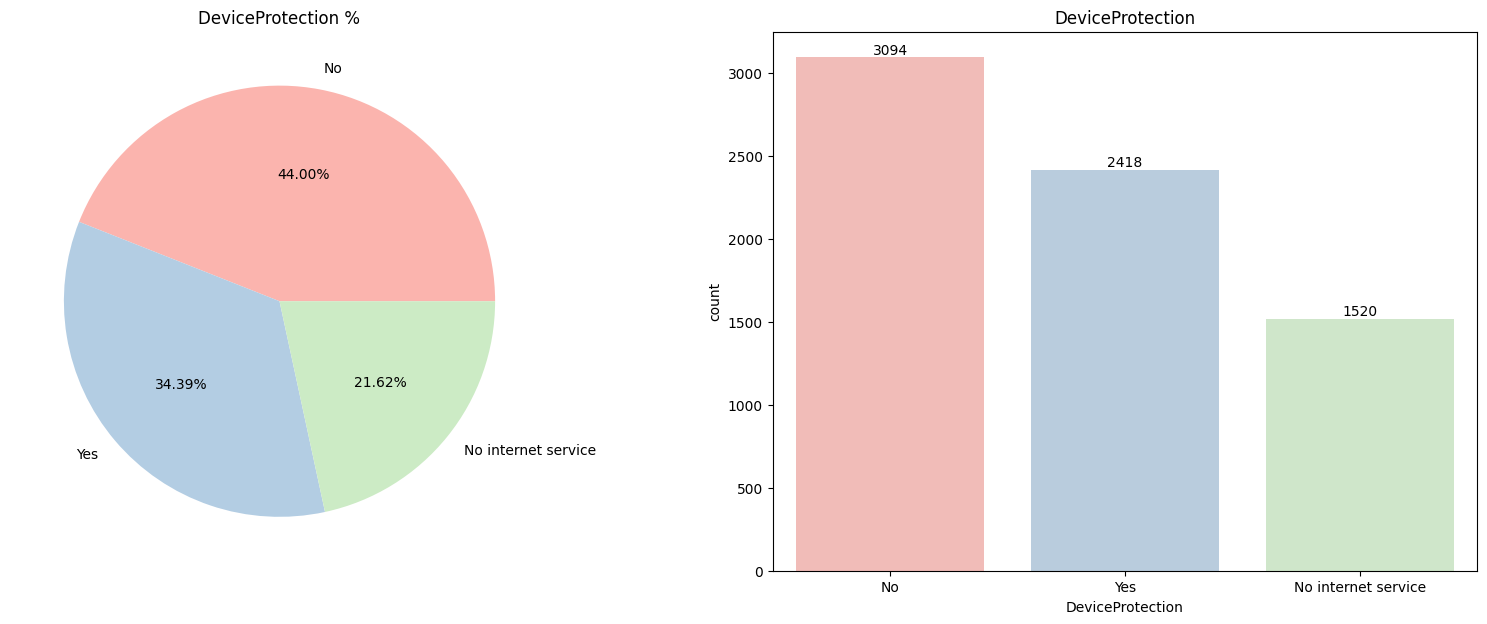

TechSupport


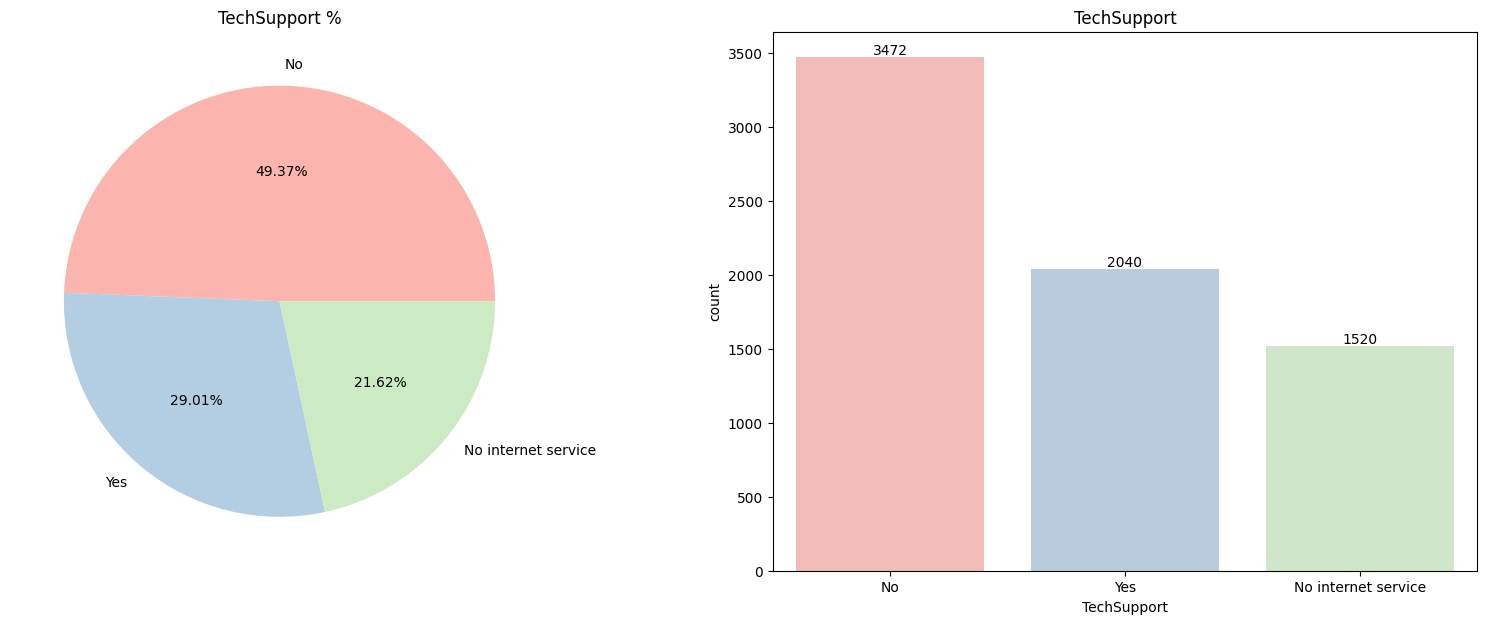

StreamingTV


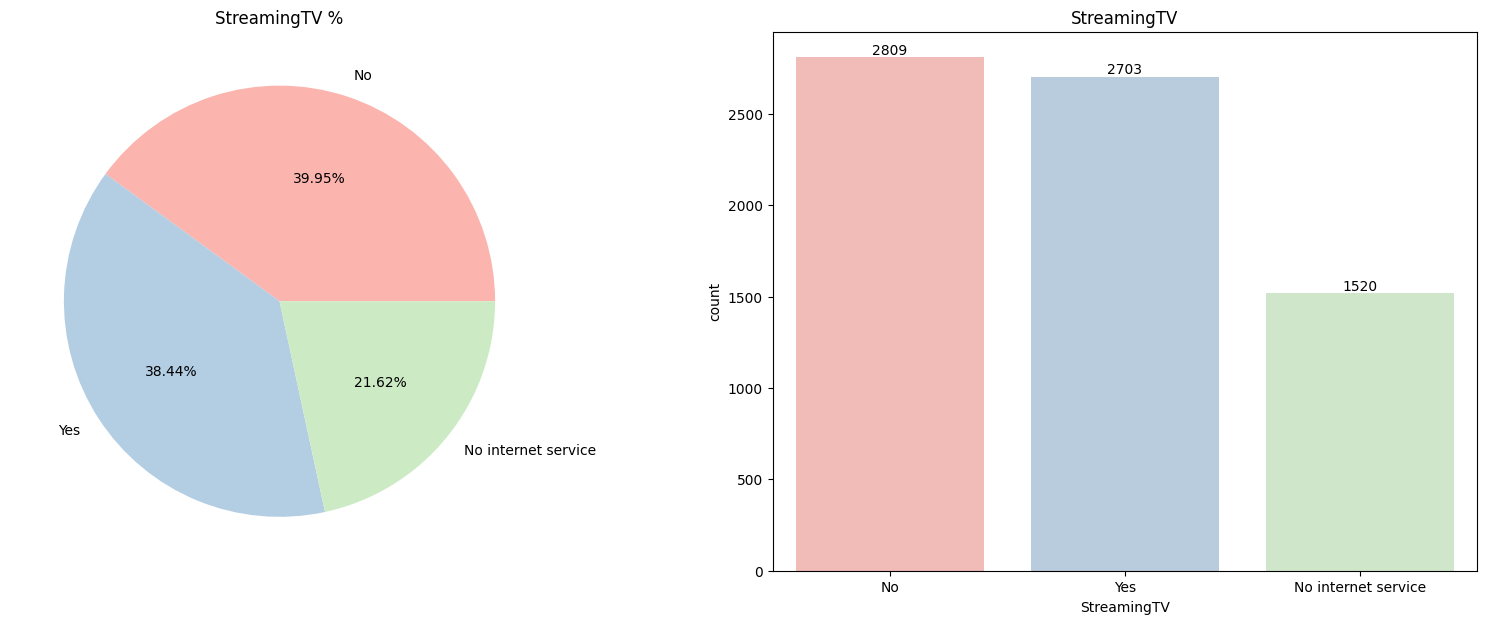

StreamingMovies


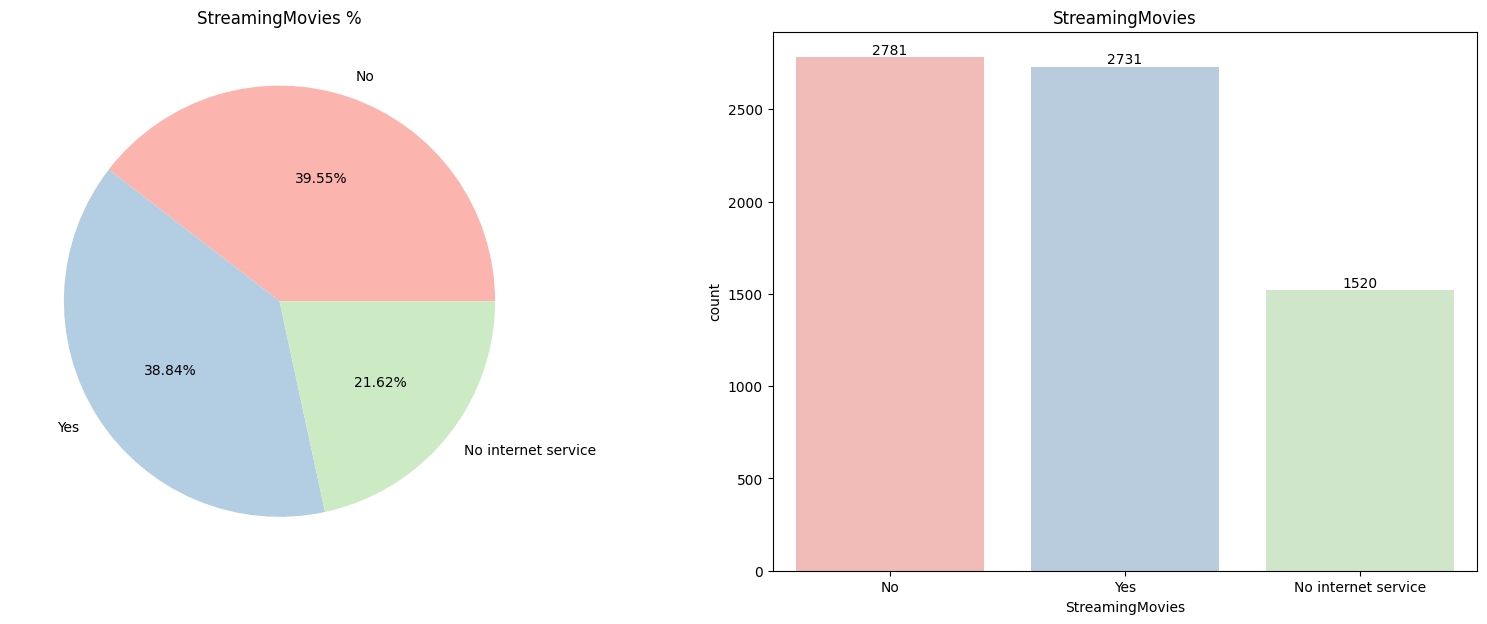

Contract


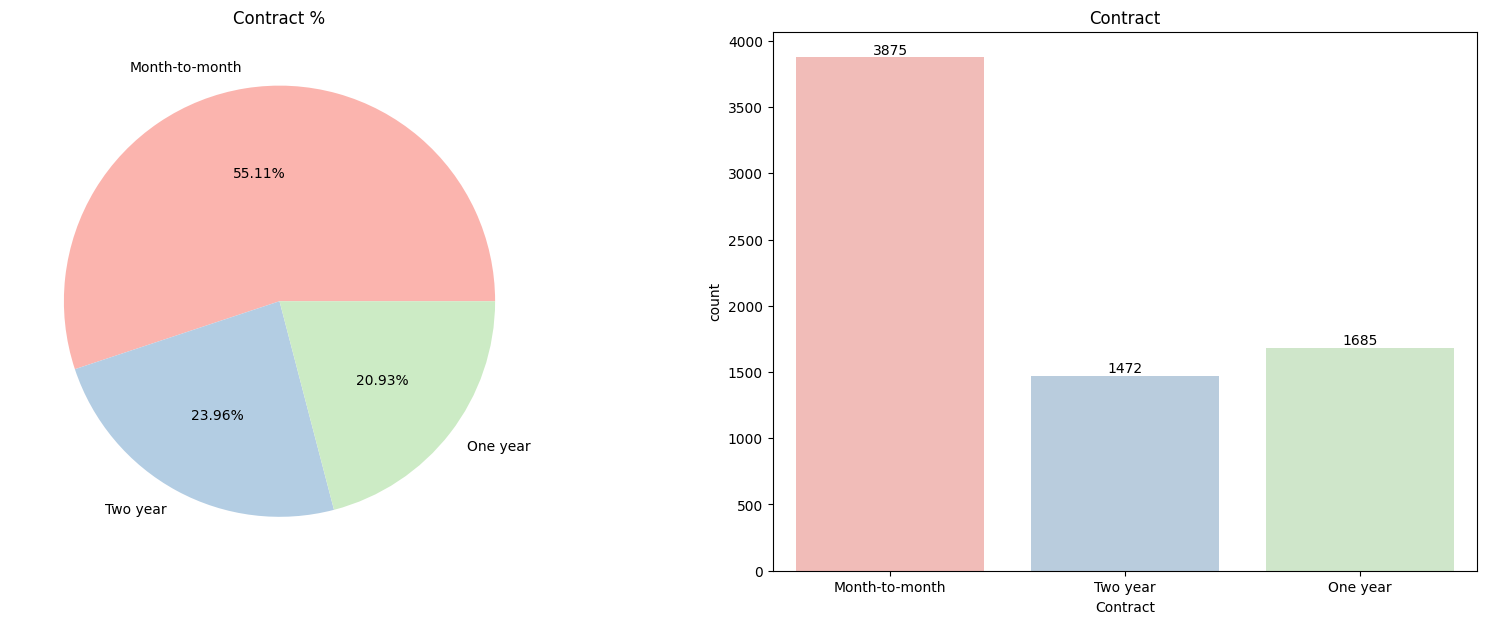

PaperlessBilling


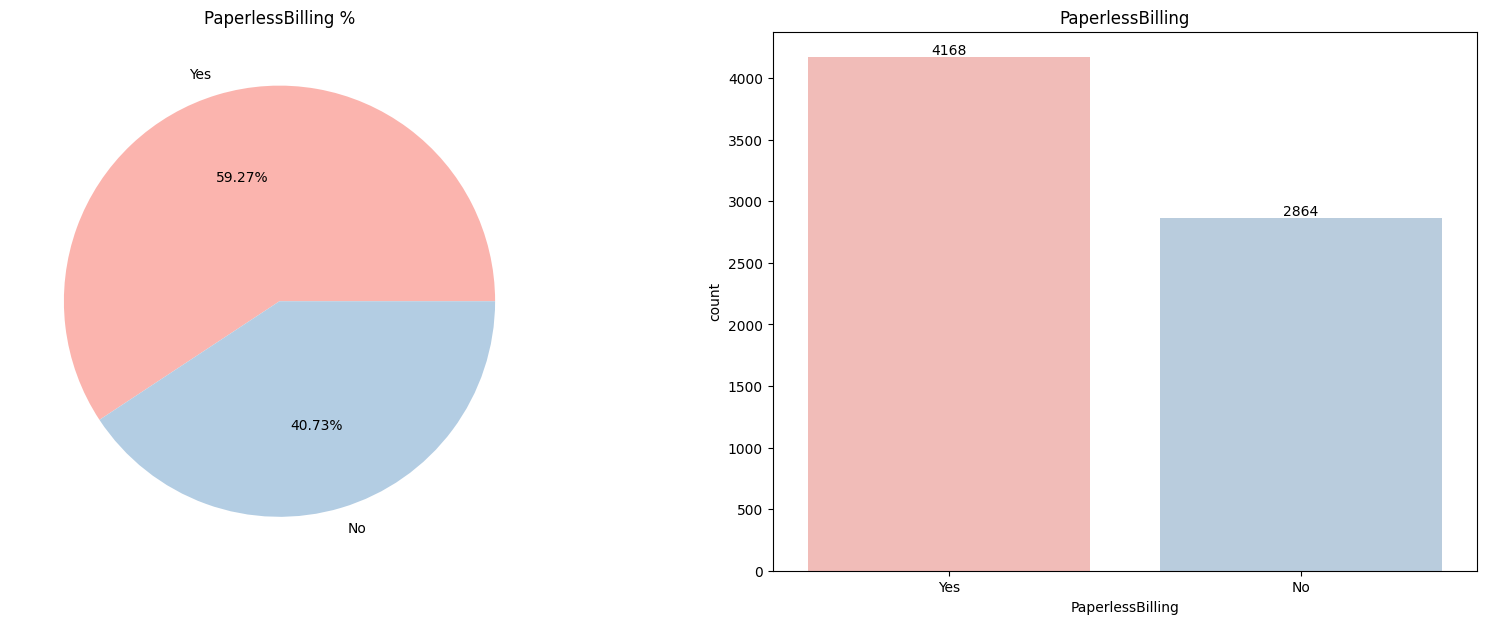

PaymentMethod


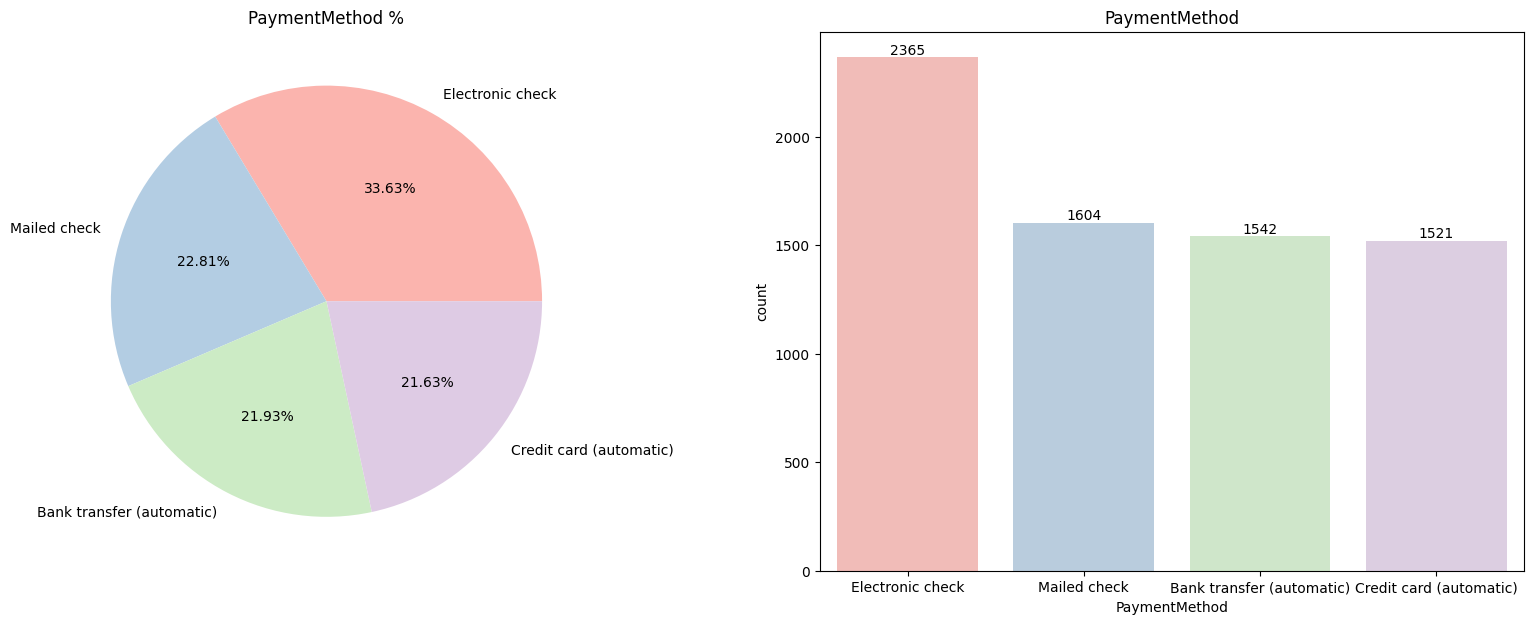

Churn


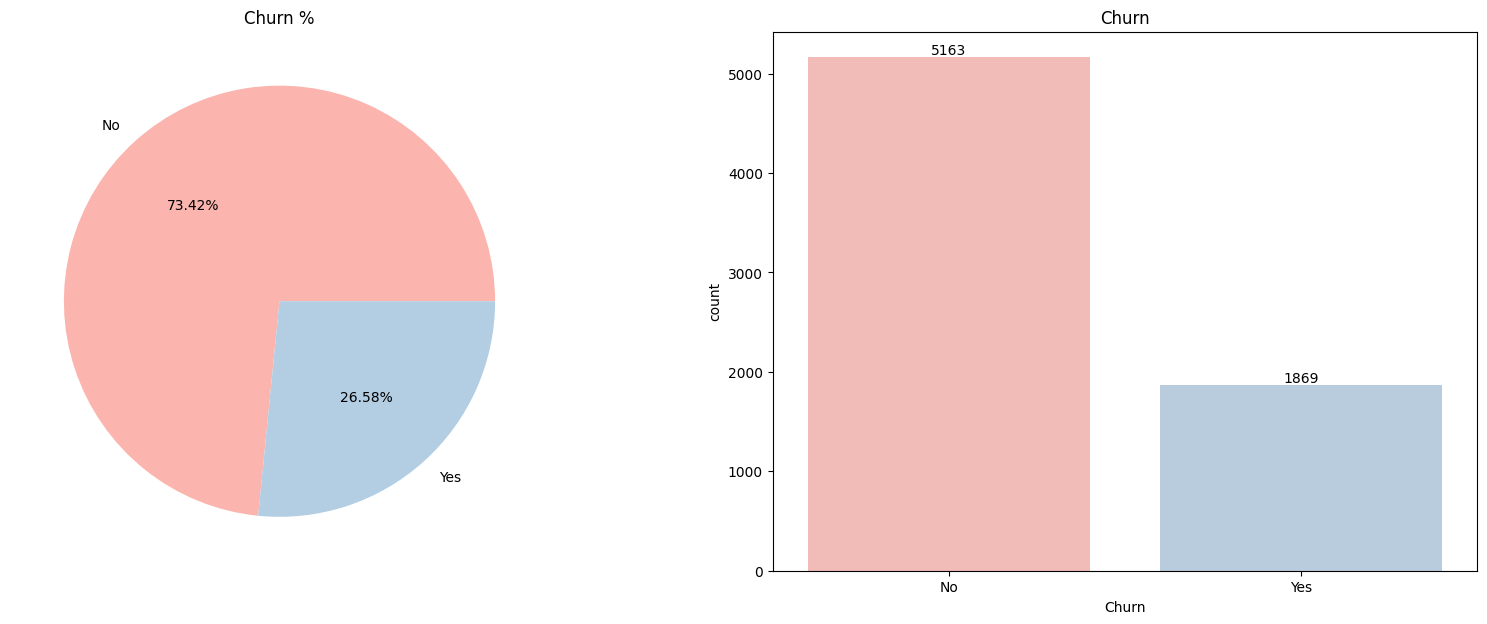

In [ ]:
for col in cate_cols:
    print(col)
    label_list = []
    cate_plot(telco, col)

Do có nhiều biến rời rạc nên ta chia tập này thành 3 nhóm biến

In [ ]:
# Customer Information
l1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Services Signed Up for!
l2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies',\
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Payment Information
l3 = ['Contract', 'PaperlessBilling', 'PaymentMethod']

**Group 1: Customer Information:**

**gender | SeniorCitizen | Partner | Dependents**

In [ ]:
gender = telco1[telco1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = telco1[telco1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = telco1[telco1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = telco1[telco1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

In [ ]:
colors

['#fbb4ae', '#b3cde3']

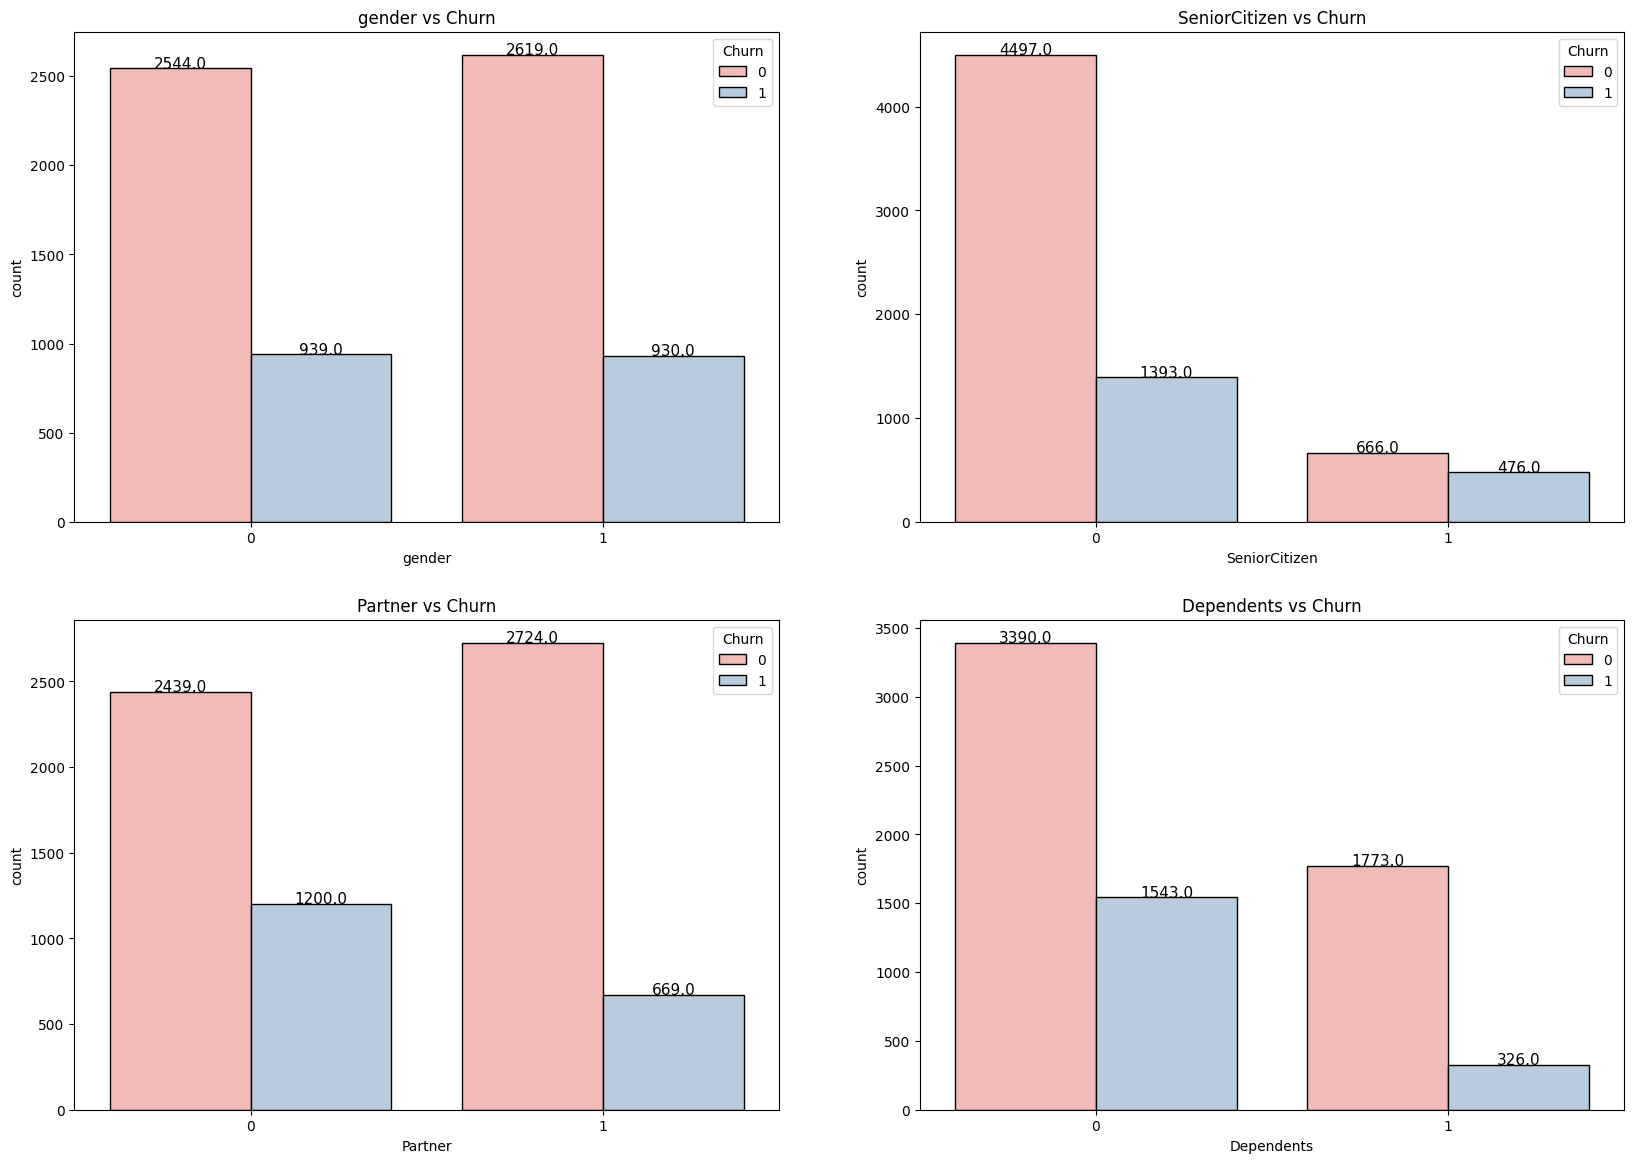

In [ ]:
colors = palette[:2]
fig = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
for i in range(len(l1)):
  plt.subplot(2, 2, i+1)
  # ax = sns.countplot(l1[i],data = telco1,hue = "Churn",palette = colors,edgecolor = 'black')
  ax = sns.countplot(x=l1[i], data=telco1, hue="Churn", palette=colors, edgecolor='black')
  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

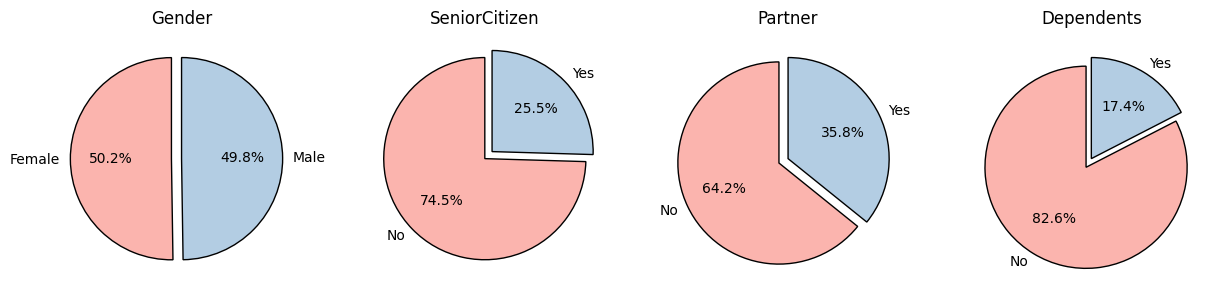

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender, labels=['Female','Male'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
       wedgeprops = {'edgecolor':'black', 'linewidth':1, 'antialiased':True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

Từ các biểu đồ trên ta có một số nhận xét như sau: 
* Tỉ lệ nam/nữ trong toàn bộ tập dữ liệu là như nhau và tỉ lệ khách hàng nam/ nữ ngừng sử dụng dịch vụ viễn thông là giống nhau. 
* Những khách hàng > 60 tuổi chỉ chiếm ⅕ tổng số khách hàng nhưng lại có khoảng 40% khách hàng từ chối tiếp tục sử dụng dịch vụ nữa. Tuy nhiên con số này chỉ chiếm khoảng 25% trong tổng số khách hàng ngừng sử dụng dịch vụ. Vì vậy, ta cần có chú ý đến những khách hàng dưới 65 tuổi nhiều hơn để làm giảm Churn Rate cho nhóm này.
* Số khách hàng sống độc thân và kết hôn có tỉ lệ xấp xỉ bằng nhau tuy nhiên lượng khách hàng độc thân ngừng sử dụng dịch vụ lại gấp 2 lần số với những khách hàng đã kết hôn.
* Số khách hàng không có người phụ thuộc lớn hơn nhiều so với những khách hàng có người phụ thuộc và tỷ lệ khách hàng không muốn sử dụng dịch vụ nữa cũng hơn hơn hẳn (chiếm 82.6%). Việc những khách hàng sống một mình và không có người phụ thuộc sẽ dẫn tới họ thấy phí khi chỉ sử dụng dịch vụ một mình khi không tận dụng được hết những tiện ích của gói dịch vụ khi sống cùng gia đình và dẫn đến việc ngừng sử dụng dịch vụ. Vì thế ta nên có những gói sản phẩm dịch vụ phù hợp cho nhóm này như share chung nhiều tài khoản với nhau.


**Group 2: Services Subscribed by the Customer:**

**PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies**

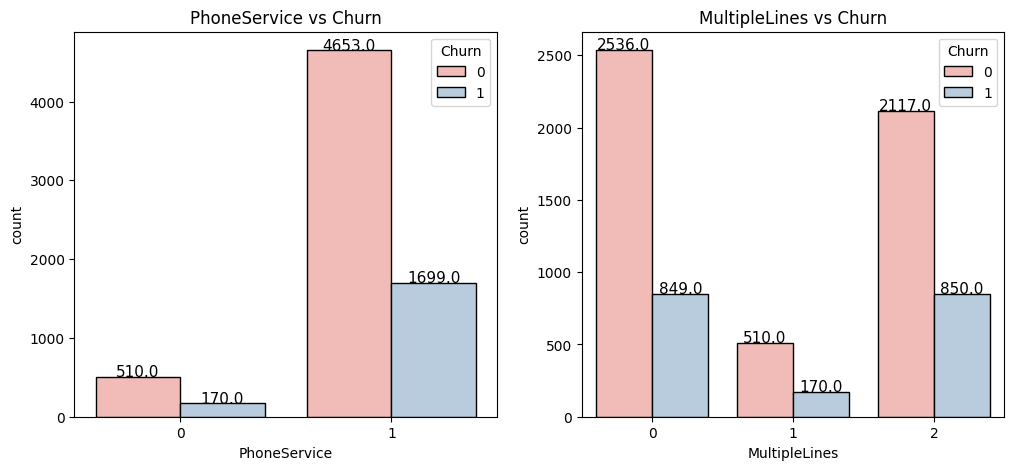

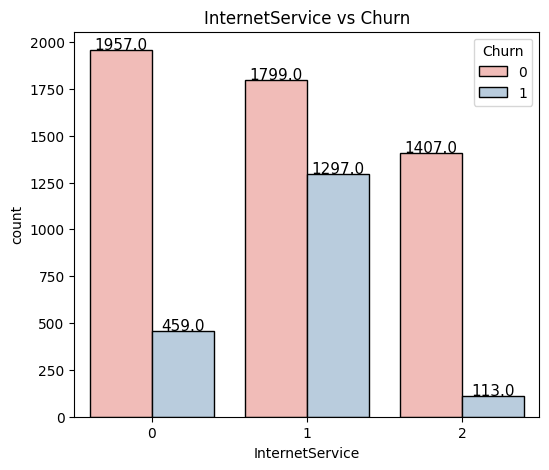

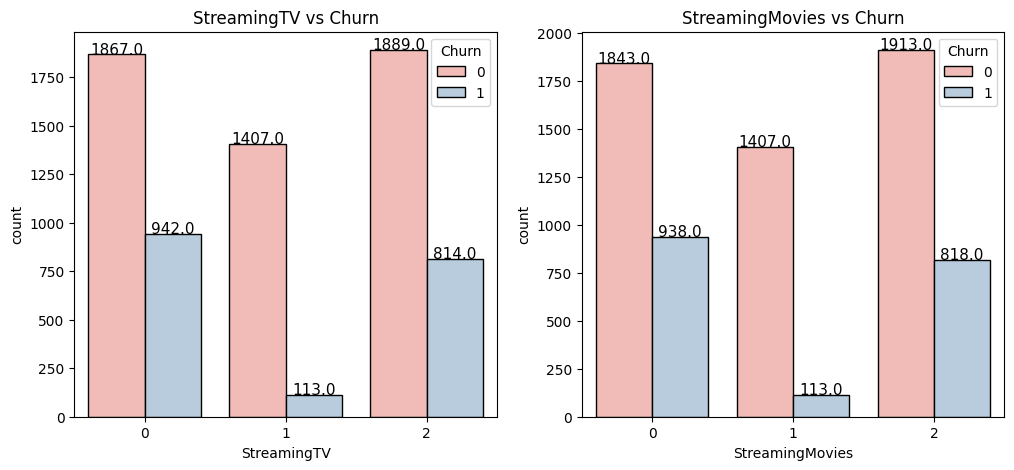

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i], data=telco1, hue="Churn", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2], data=telco1, hue="Churn", palette=colors, edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i + 3], data=telco1, hue="Churn", palette=colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

In [ ]:
phoneservice = telco1[telco1['Churn'] == 1]['PhoneService'].value_counts()
# No - Yes
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] 

multiplelines = telco1[telco1['Churn'] == 1]['MultipleLines'].value_counts()
# No - No Phone Service - Yes 
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] 

internetservice = telco1[telco1['Churn'] == 1]['InternetService'].value_counts()
# DSL - Fiber Optic - No 
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] 

streamingtv = telco1[telco1['Churn'] == 1]['StreamingTV'].value_counts()
# No - No Internet Service - Yes 
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] 

streamingmovies = telco1[telco1['Churn'] == 1]['StreamingMovies'].value_counts()
# No - No Internet Service - Yes
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100]  

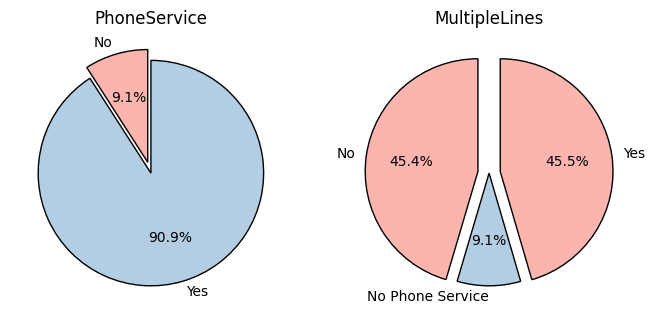

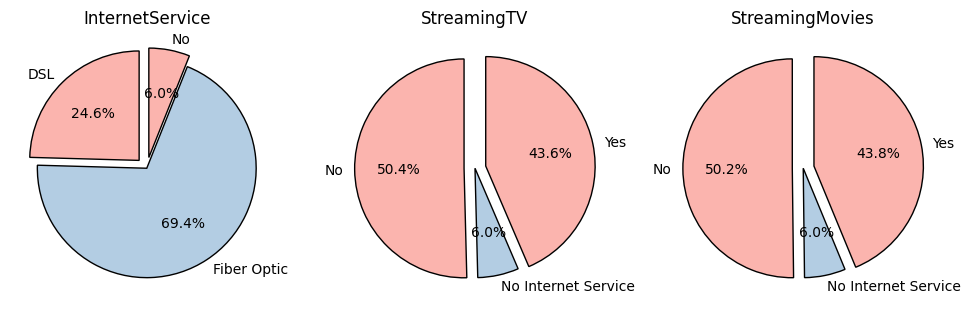

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

Từ các biểu đồ trên ta có một số nhận xét như sau:
* Hầu hết các khách hàng đều sử dụng dịch vụ điện thoại nên số khách hàng ngừng dịch vụ ở nhóm này cũng chiếm phần lớn
* Số lượng khách hàng sử dụng và không sử dụng dịch vụ MultipleLines có tỷ trọng ngang nhau trên toàn tập dữ liệu và tỷ lệ khách hàng Churn
* Với InternetSevice cần chú ý đến những loại dịch vụ intennet được cung cấp qua Fiber Optic vì nó có tỷ lệ churn lớn nhất 69.4% so với các giá trị còn lại
* StreamingTV và StreamigMovies cho tỷ trọng giống nhau về các nhãn và tỷ lệ churn


**Group 2: Services Subscribed by the Customer :**

**OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |**

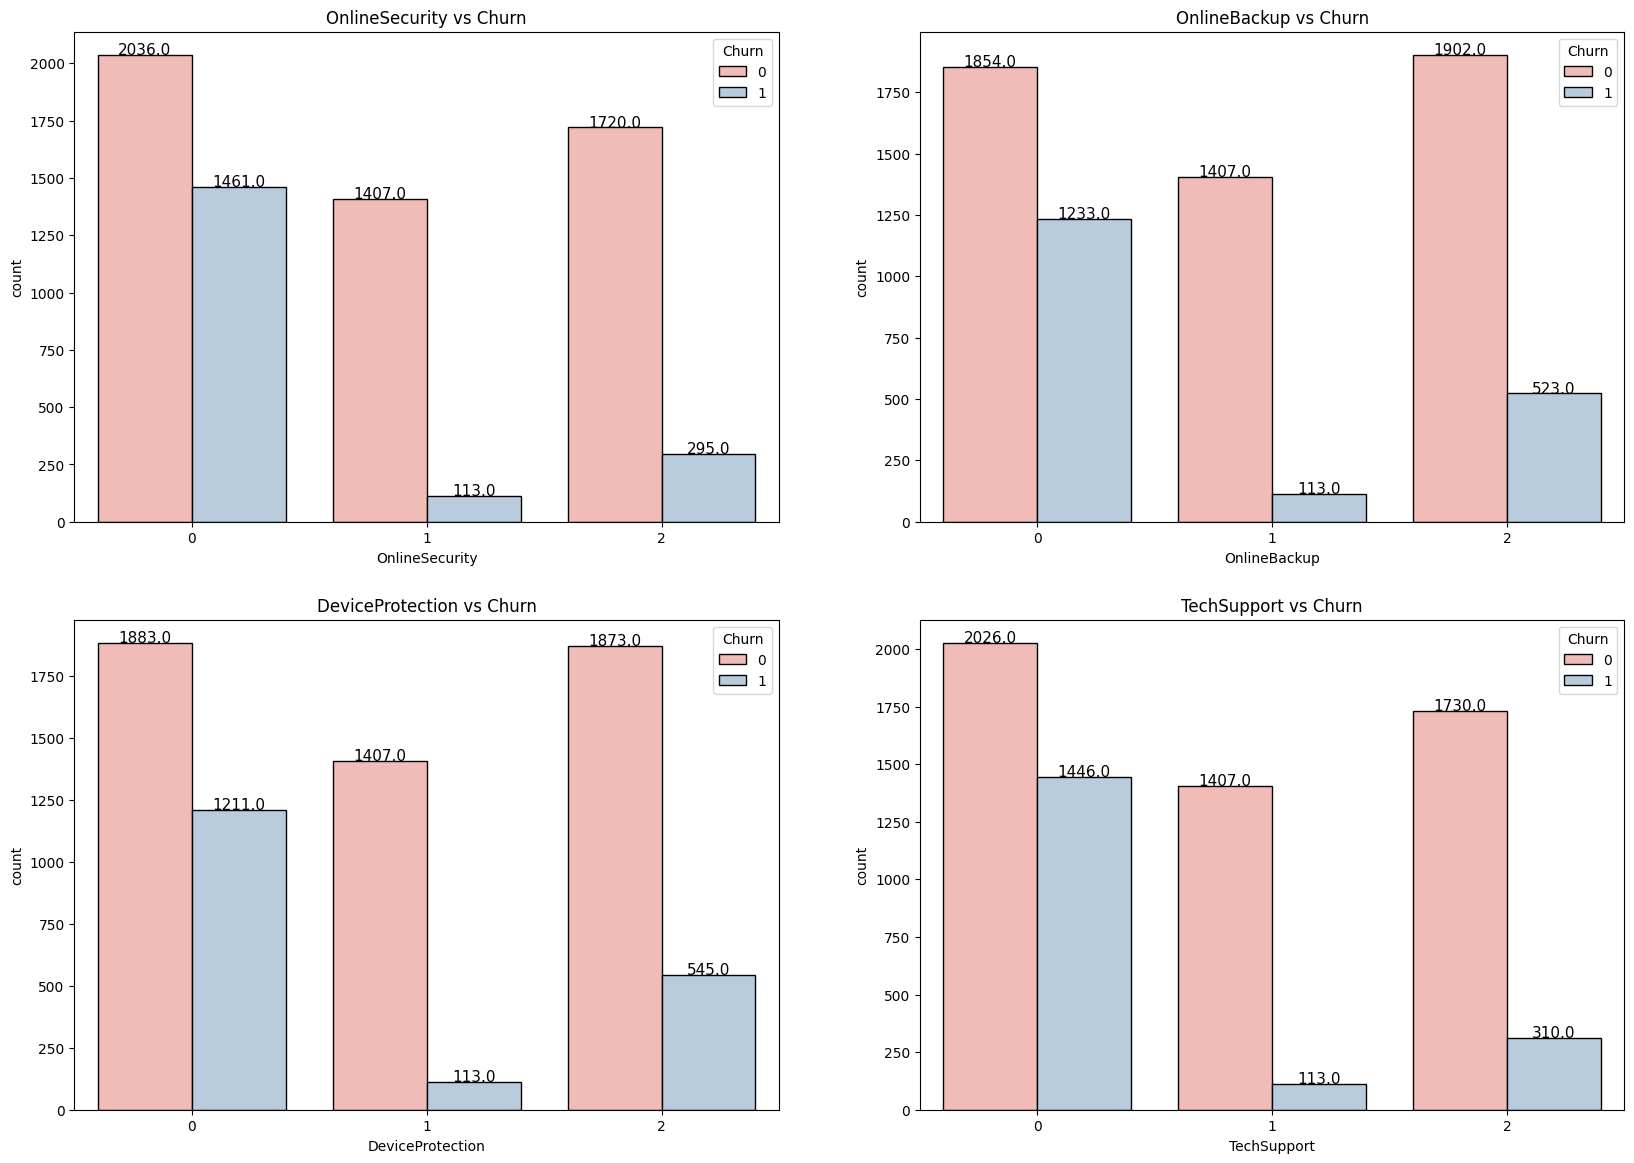

In [ ]:
fig = plt.subplots(nrows=2, ncols=2, figsize=(20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=l2[-4 + i], data=telco1, hue="Churn", palette=colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

In [ ]:
onlinesecurity = telco1[telco1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = telco1[telco1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = telco1[telco1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = telco1[telco1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

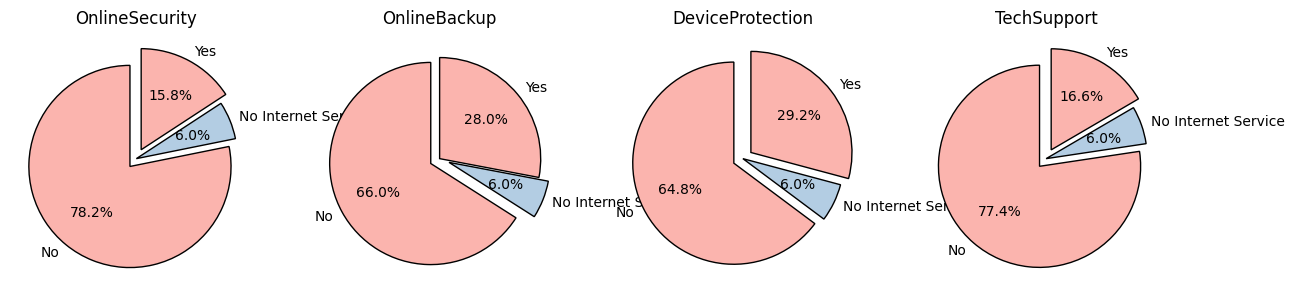

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

* Với những dịch vụ còn lại OnlineSecurity, OnlineBackup, DeviceProtection và TechSupport cũng có pattern chung khi những khách hàng không sử dụng các dịch vụ này sẽ có khả năng cao dừng sử dụng dịch vụ của doanh nghiệp


**Group 3 : Contract | PaperlessBilling | PaymentMethod |**

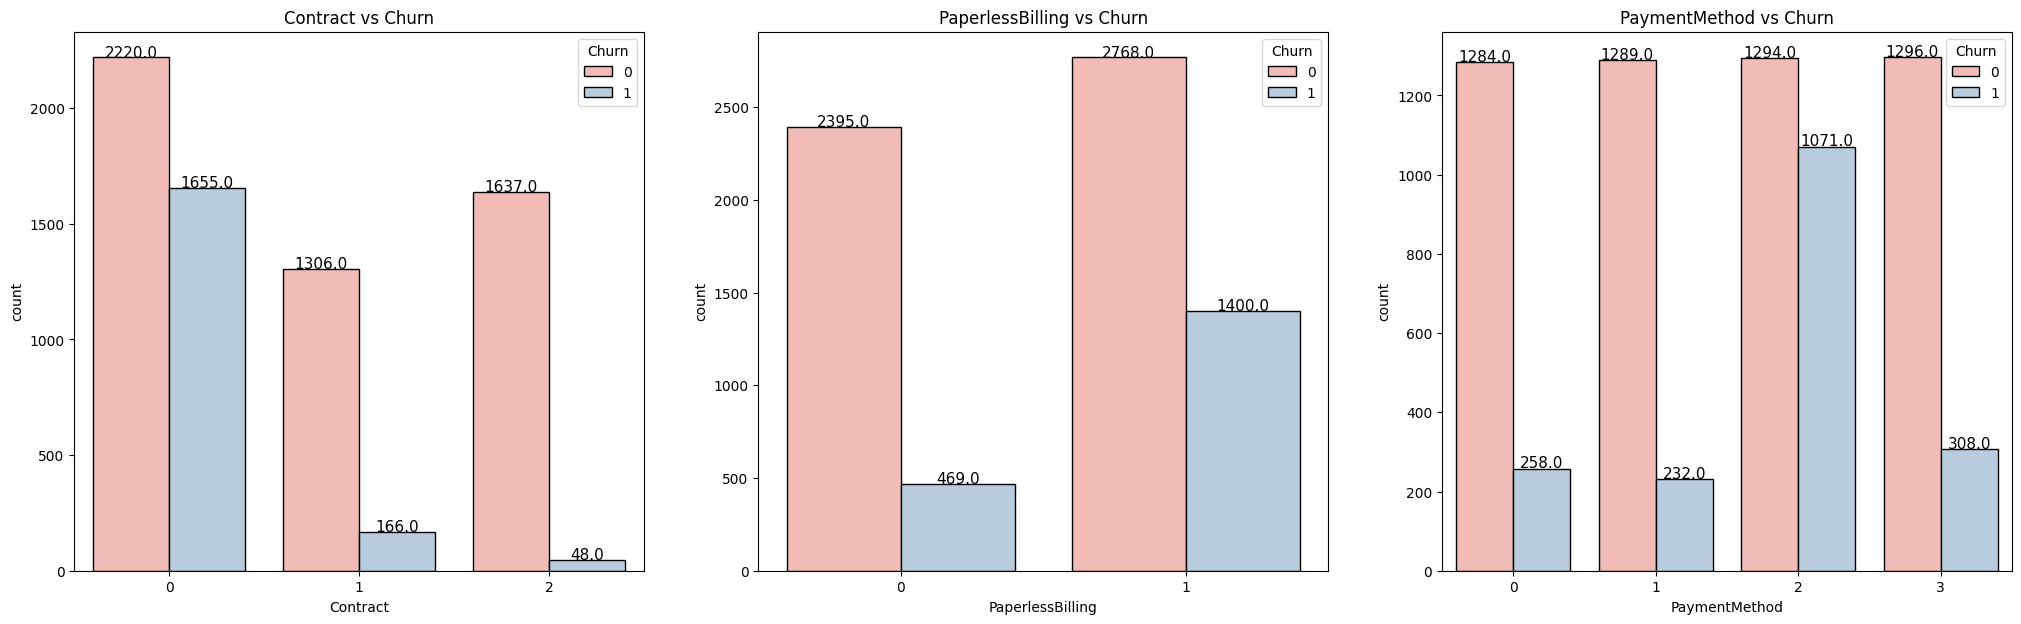

In [ ]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0], data=telco1, hue="Churn", palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1], data=telco1, hue="Churn", palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2], data=telco1, hue="Churn", palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

In [ ]:
contract = telco1[telco1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = telco1[telco1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = telco1[telco1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 

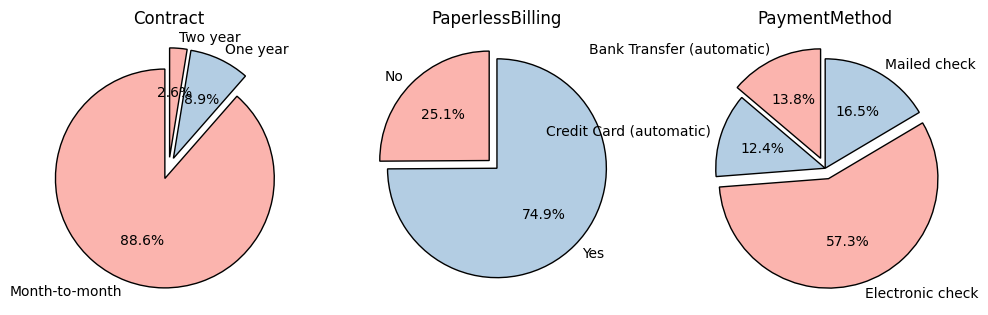

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

Từ các biểu đồ trên ta có một số nhận xét như sau:
* Ta thấy rằng khách hàng ký hợp đồng theo năm thì tỉ lệ Churn thấp hơn. Khách hàng ký HĐ theo tháng tỷ lệ Churn cao hơn, điều này cũng dễ hiểu khi KH dùng gói tháng để thử các dịch vụ.
* Điều trên cũng được lý giải do loại dịch vụ khách hàng sử dụng. Tùy từng ưu tiên dùng dịch vụ: Internet Service, Streaming Service, Phone Service. Nếu KH sử dụng dịch vụ này theo gói năm rồi có thể sẽ cut gói khác và dùng theo tháng.
* PaperlessBilling có tỷ lệ Churn cao hơn so với không dùng dịch vụ, có thể do lỗi dịch vụ.
* Electronic check cần được miễn phí hoặc loại bỏ, do 1071/2365 KH dùng loại dịch vụ này rời đi


## Tương quan giữa các biến đầu vào với biến đầu ra

<Axes: >

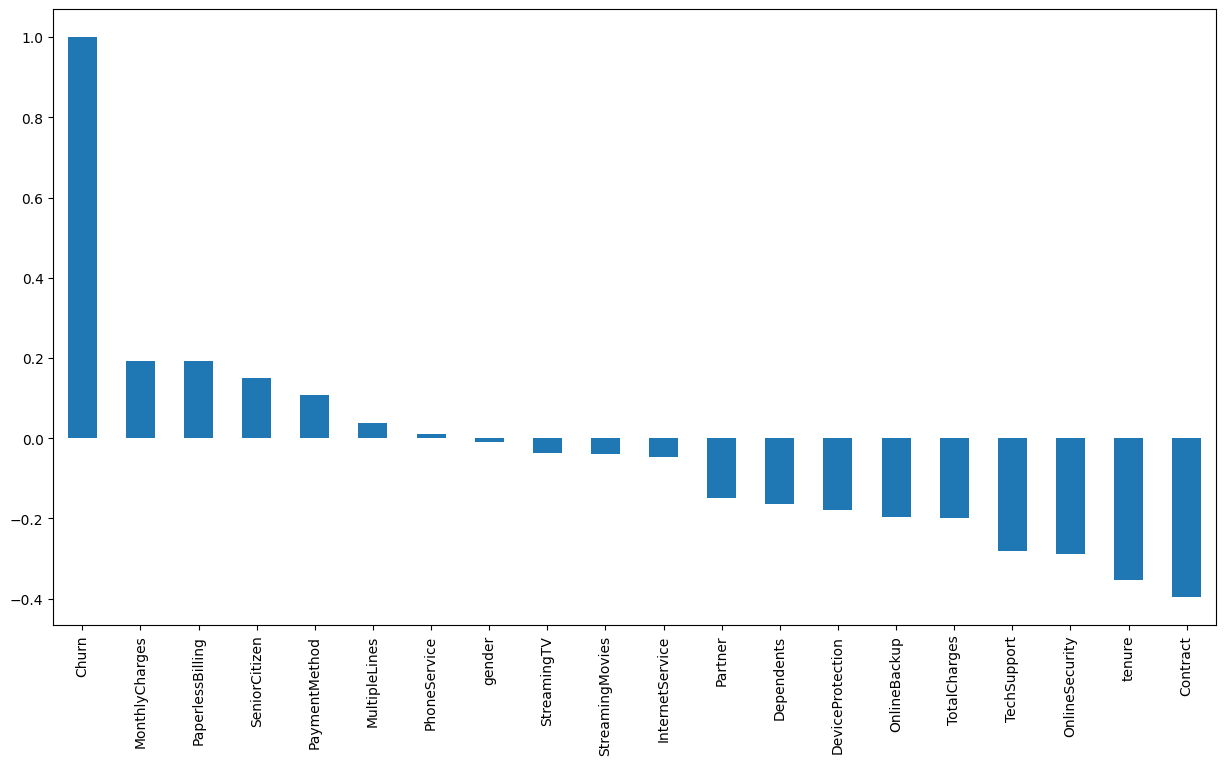

In [ ]:
plt.figure(figsize=(15, 8))
telco1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# 2.Feature Engineering

## Label Encoding

In [ ]:
col = list(telco1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(telco[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

telco1 = telco.copy(deep = True)
text_data_features = [i for i in list(telco.columns) if i not in list(telco.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
  telco1[i] = le.fit_transform(telco1[i])
  print(i, ' : ', telco1[i].unique(), ' =', le.inverse_transform(telco1[i].unique()))

## Data Scaling

In [ ]:
telco1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms = MinMaxScaler()   # Normalization
telco1['tenure'] = mms.fit_transform(telco1[['tenure']])
telco1['MonthlyCharges'] = mms.fit_transform(telco1[['MonthlyCharges']])
telco1['TotalCharges'] = mms.fit_transform(telco1[['TotalCharges']])
telco1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


## Correlation Matrix

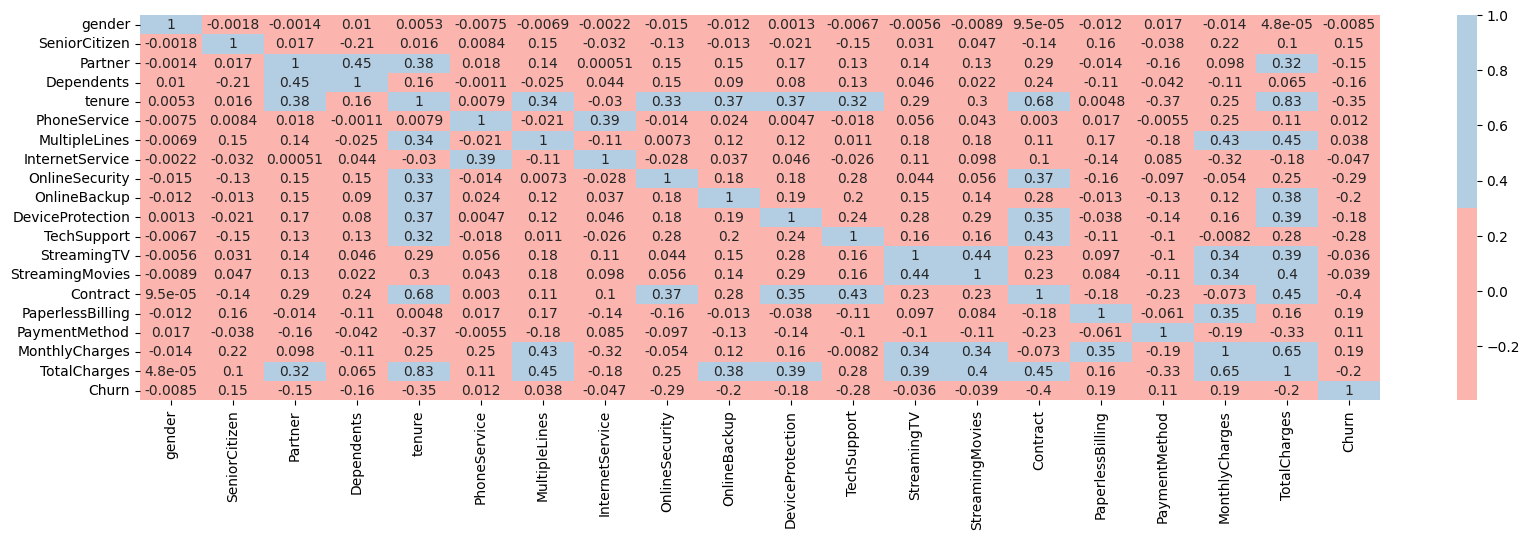

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(telco1.corr(), cmap = colors, annot = True);

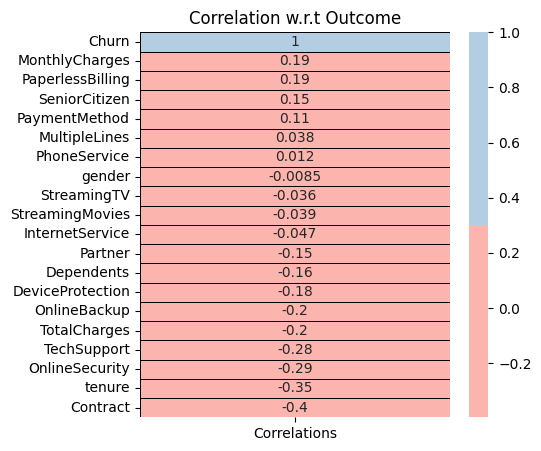

In [ ]:
corr = telco1.corrwith(telco1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

- Bỏ đi features có correlation coefficient trong khoảng (-0.1, 0.1): MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService 
- Giữ lại các features có hệ số tương đối đáng kể

In [ ]:
telco1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
telco1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,0,2,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.464789,2,0,2,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.014085,2,2,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.619718,2,0,2,2,1,0,0,0.239303,0.210241,0
4,0,0,0,0.014085,0,0,0,0,0,1,2,0.521891,0.015330,1


## Data Balancing using SMOTE:

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE(sampling_strategy = 1)

f1 = telco1.iloc[:,:13].values
t1 = telco1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5163, 1: 5163})

# 3.Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

- Tiến hành giữ lại các feature có ý nghĩa sau khi thực hiện 2 bài test phía trên, chia tập dữ liệu theo train/test - 80/20

In [ ]:
# Funtion for general model
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## Logistic Regression Classifier

In [ ]:
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression

classifier_logis = LogisticRegression(penalty='l2', class_weight={0: 0.68, 1: 0.32}, solver='lbfgs', multi_class='ovr')

Cross Validation Score :  84.78%
ROC_AUC Score :  75.45%


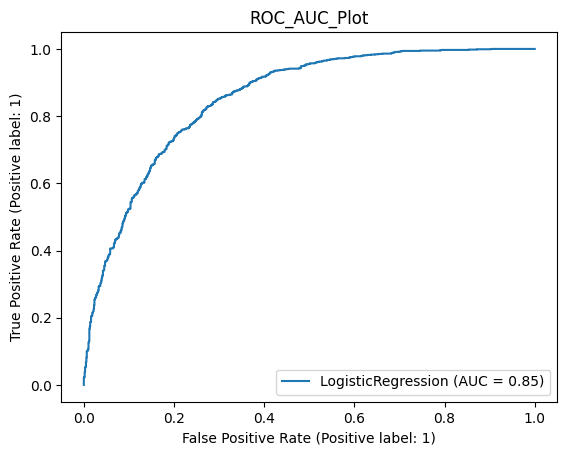

In [ ]:
model(classifier_logis, x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.71      0.85      0.77      4101
           1       0.81      0.65      0.72      4159

    accuracy                           0.75      8260
   macro avg       0.76      0.75      0.75      8260
weighted avg       0.76      0.75      0.75      8260



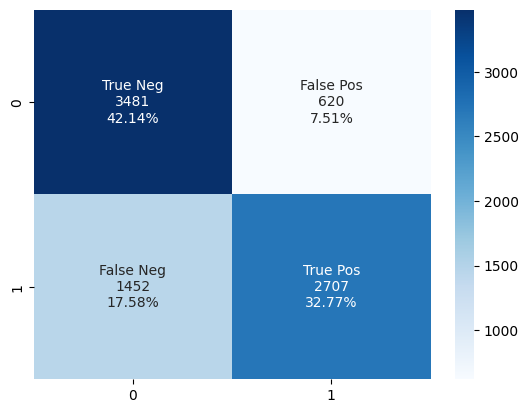

In [ ]:
model_evaluation(classifier_logis, x_train, y_train)

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1062
           1       0.80      0.67      0.73      1004

    accuracy                           0.76      2066
   macro avg       0.76      0.75      0.75      2066
weighted avg       0.76      0.76      0.75      2066



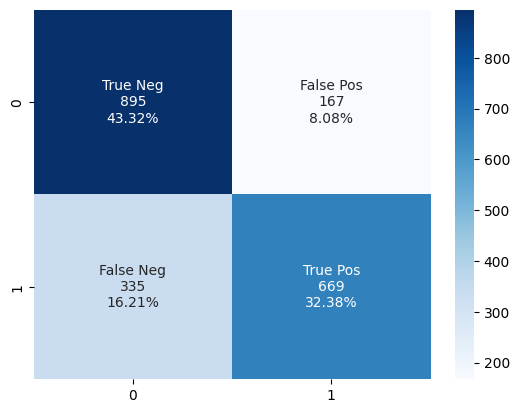

In [ ]:
model_evaluation(classifier_logis, x_test, y_test)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  83.95%
ROC_AUC Score :  77.52%


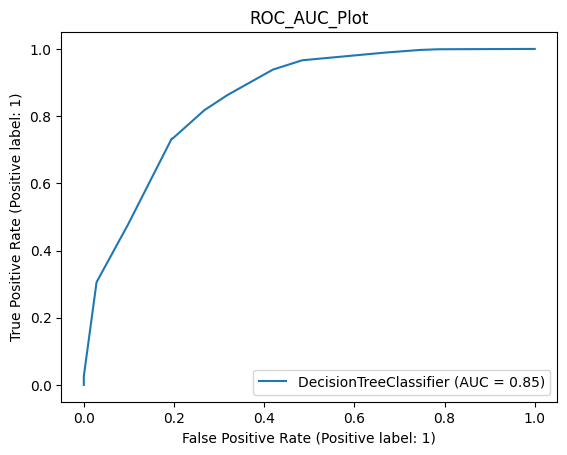

In [ ]:
model(classifier_dt,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      4101
           1       0.76      0.81      0.78      4159

    accuracy                           0.77      8260
   macro avg       0.78      0.77      0.77      8260
weighted avg       0.78      0.77      0.77      8260



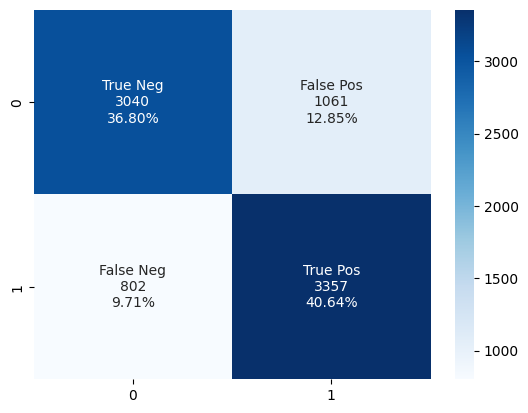

In [ ]:
model_evaluation(classifier_dt, x_train, y_train)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1062
           1       0.74      0.82      0.78      1004

    accuracy                           0.77      2066
   macro avg       0.78      0.78      0.77      2066
weighted avg       0.78      0.77      0.77      2066



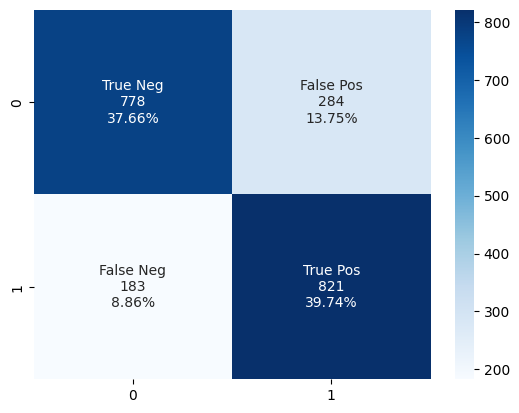

In [ ]:
model_evaluation(classifier_dt,x_test,y_test)

## Xgboost Classifier

In [ ]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01, max_depth = 3, n_estimators = 1000)

Cross Validation Score :  90.13%
ROC_AUC Score :  82.97%


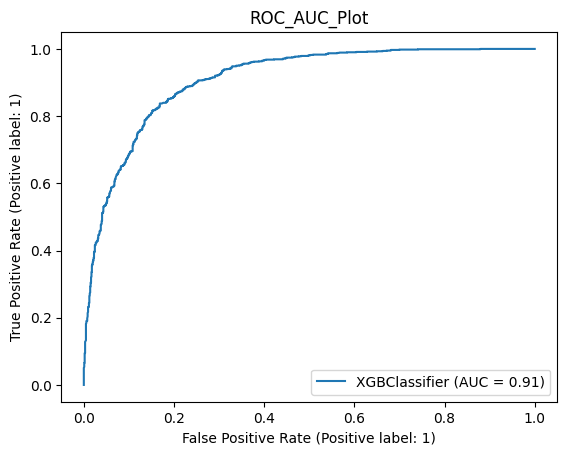

In [ ]:
model(classifier_xgb, x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      4101
           1       0.81      0.88      0.84      4159

    accuracy                           0.83      8260
   macro avg       0.84      0.83      0.83      8260
weighted avg       0.84      0.83      0.83      8260



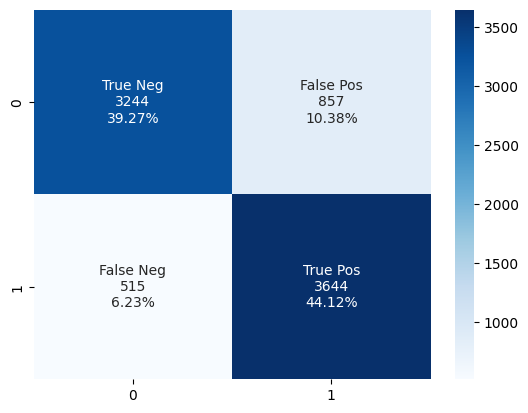

In [ ]:
model_evaluation(classifier_xgb, x_train, y_train)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1062
           1       0.79      0.88      0.83      1004

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



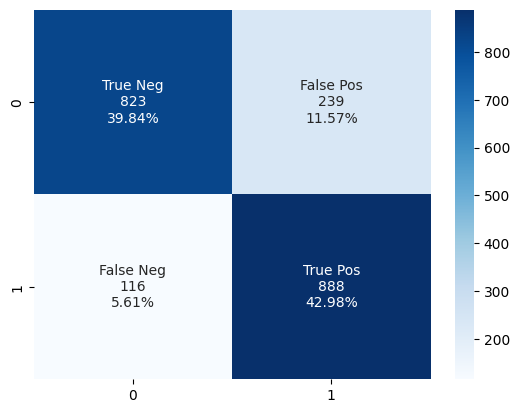

In [ ]:
model_evaluation(classifier_xgb, x_test, y_test)

## LightGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  90.20%
ROC_AUC Score :  82.78%


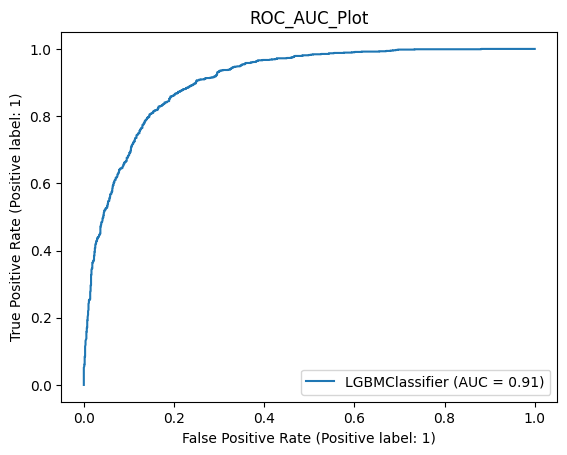

In [ ]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      4101
           1       0.81      0.88      0.84      4159

    accuracy                           0.83      8260
   macro avg       0.84      0.83      0.83      8260
weighted avg       0.84      0.83      0.83      8260



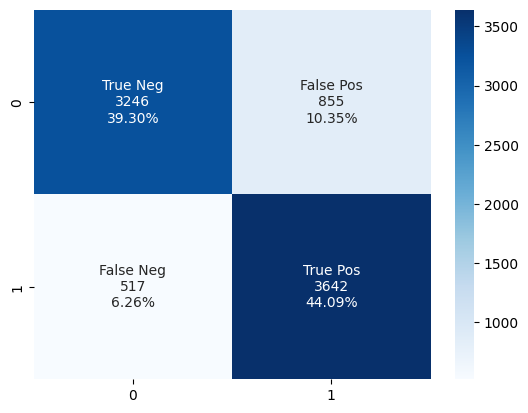

In [ ]:
model_evaluation(classifier_lgbm, x_train, y_train)

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1062
           1       0.79      0.88      0.83      1004

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



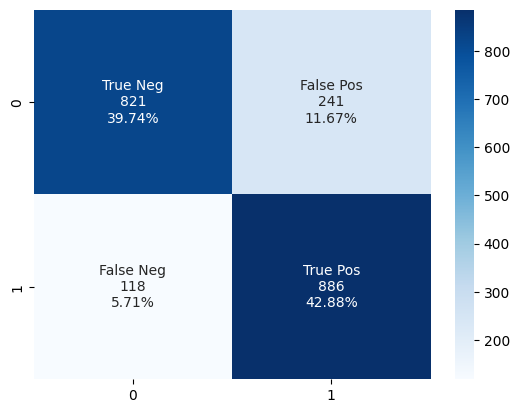

In [ ]:
model_evaluation(classifier_lgbm,x_test,y_test)

#4.Explainable Model

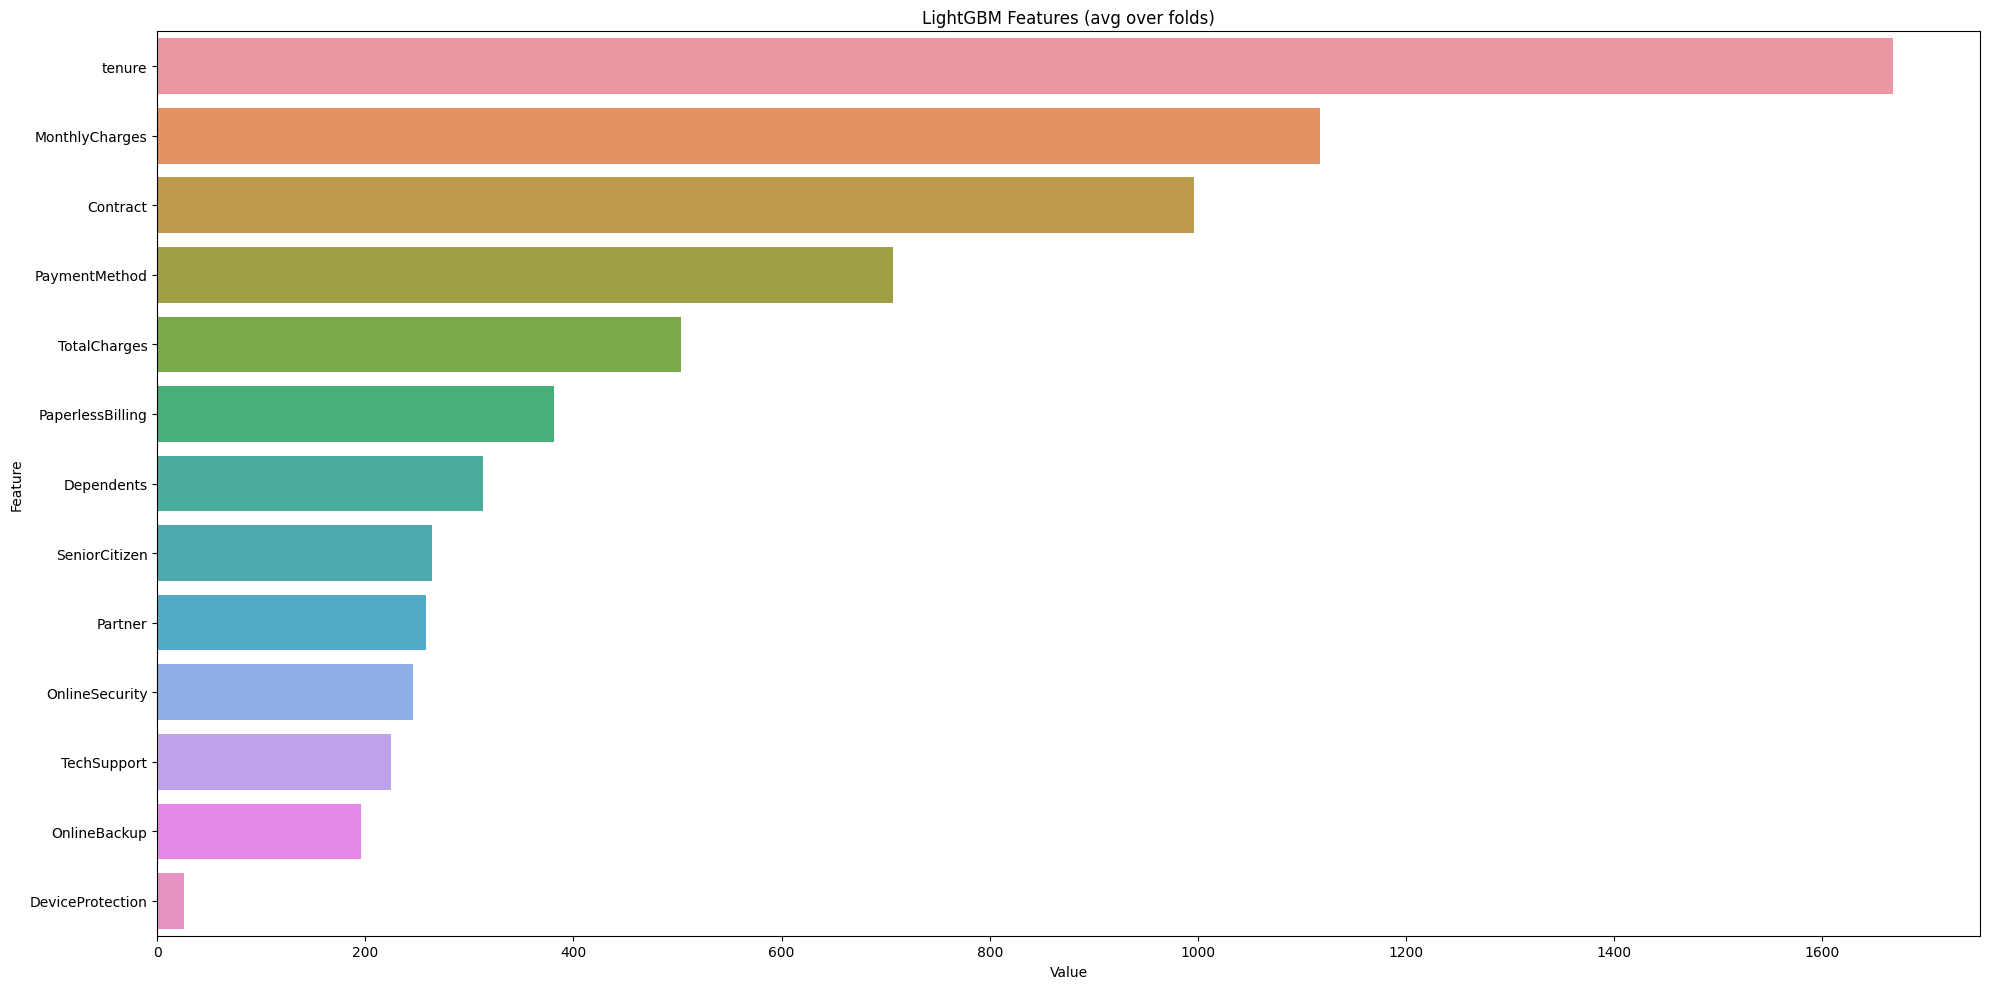

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(classifier_lgbm.feature_importances_, telco1.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')